In [1]:
# 1. LIBRARY IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import os
import time

In [2]:
# 2. SETUP: CREATE DIRECTORIES
os.makedirs('data', exist_ok=True)
os.makedirs('results/visualizations', exist_ok=True)

Dataset loaded successfully.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


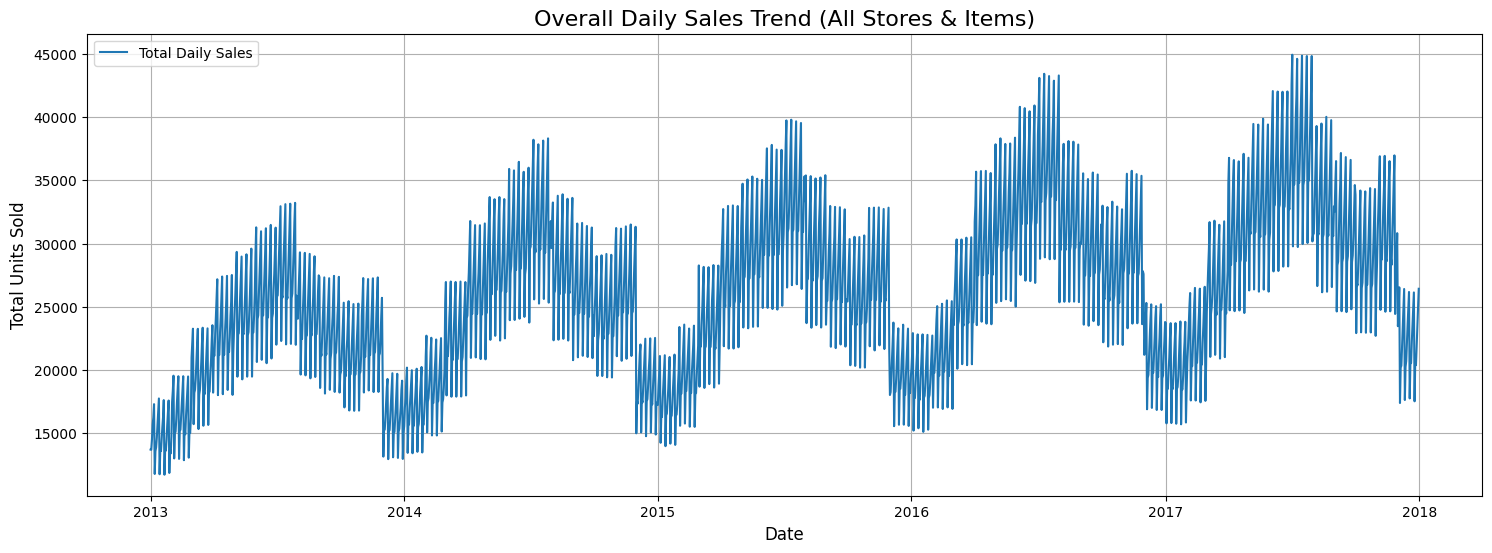

In [3]:
# 3. DATA LOADING AND EDA
try:
    df = pd.read_csv('data/train.csv')
    df['date'] = pd.to_datetime(df['date'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("\nERROR")
    exit()

print("\nData Info:")
df.info()

daily_sales = df.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(18, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Total Daily Sales')
plt.title('Overall Daily Sales Trend (All Stores & Items)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

          ds   y
0 2013-01-01  13
1 2013-01-02  11
2 2013-01-03  14
3 2013-01-04  13
4 2013-01-05  10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2pu76t85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/q1yhn0a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3979', 'data', 'file=/tmp/tmpgaexswla/2pu76t85.json', 'init=/tmp/tmpgaexswla/q1yhn0a4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgrpkvvvp/prophet_model-20250721151706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecast preview:
             ds       yhat  yhat_lower  yhat_upper
2186 2018-12-27  17.104862   11.476210   22.974237
2187 2018-12-28  18.778261   12.701813   24.578804
2188 2018-12-29  20.835942   14.919826   26.151130
2189 2018-12-30  21.747223   15.957782   27.170240
2190 2018-12-31  13.601689    7.965416   19.622449


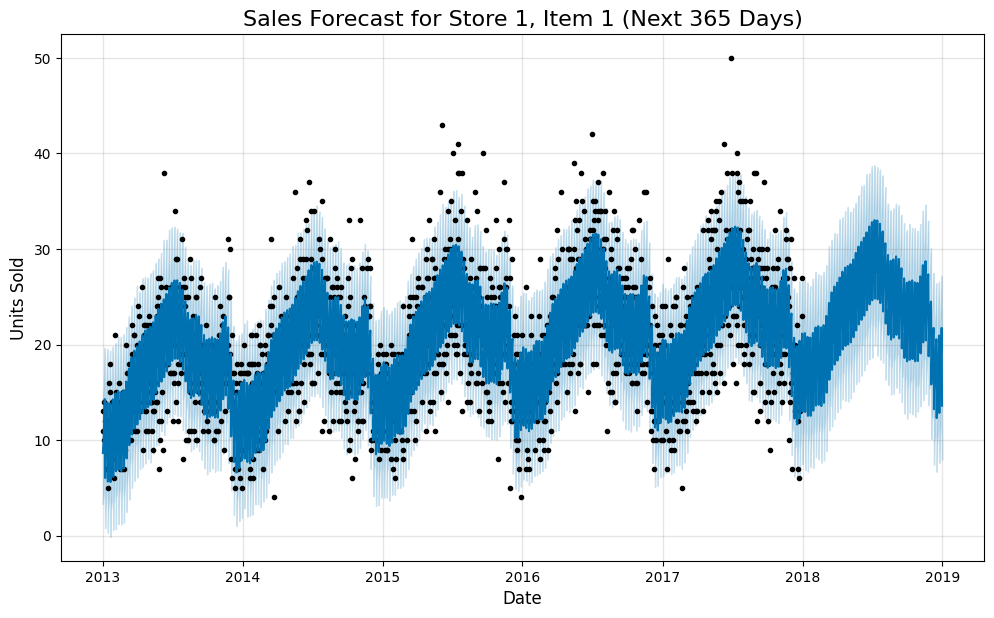

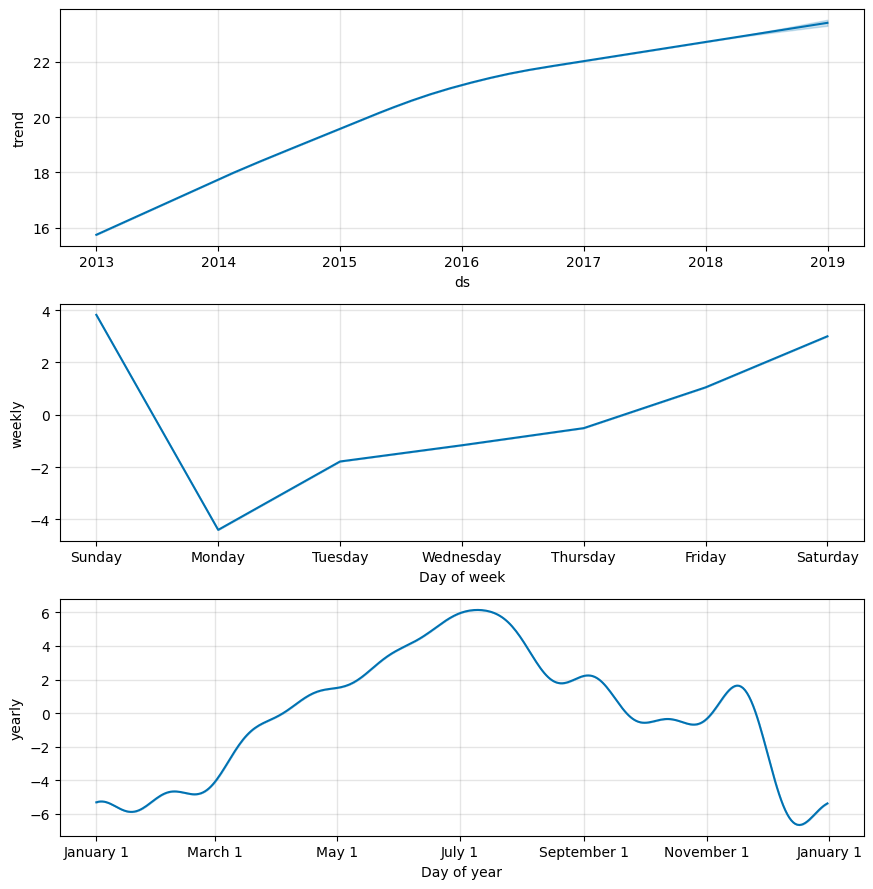

INFO:prophet:Making 3 forecasts with cutoffs between 2016-01-06 00:00:00 and 2016-12-31 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b1h2qghx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j_avugre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74109', 'data', 'file=/tmp/tmpgaexswla/b1h2qghx.json', 'init=/tmp/tmpgaexswla/j_avugre.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelal_uagxi/prophet_model-20250721151709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ogqa0uyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_65l964y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


Model Performance Metrics:
     horizon        mse      rmse       mae      mape     mdape     smape  \
0    37 days  19.877620  4.458432  3.738523  0.245137  0.154775  0.208491   
1    38 days  20.508561  4.528638  3.768250  0.251233  0.157843  0.211694   
2    39 days  20.780501  4.558564  3.771359  0.250391  0.152229  0.210918   
3    40 days  20.436771  4.520705  3.718683  0.251663  0.152229  0.210965   
4    41 days  20.783264  4.558867  3.749315  0.249611  0.152748  0.210431   
..       ...        ...       ...       ...       ...       ...       ...   
324 361 days  29.517314  5.432984  4.275842  0.267111  0.166450  0.219795   
325 362 days  28.827587  5.369133  4.168894  0.262508  0.163721  0.215692   
326 363 days  29.199648  5.403670  4.217256  0.268725  0.164197  0.220068   
327 364 days  29.476577  5.429234  4.241544  0.271112  0.166704  0.221797   
328 365 days  29.609119  5.441426  4.264851  0.273351  0.169247  0.223469   

     coverage  
0    0.761468  
1    0.758410  

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


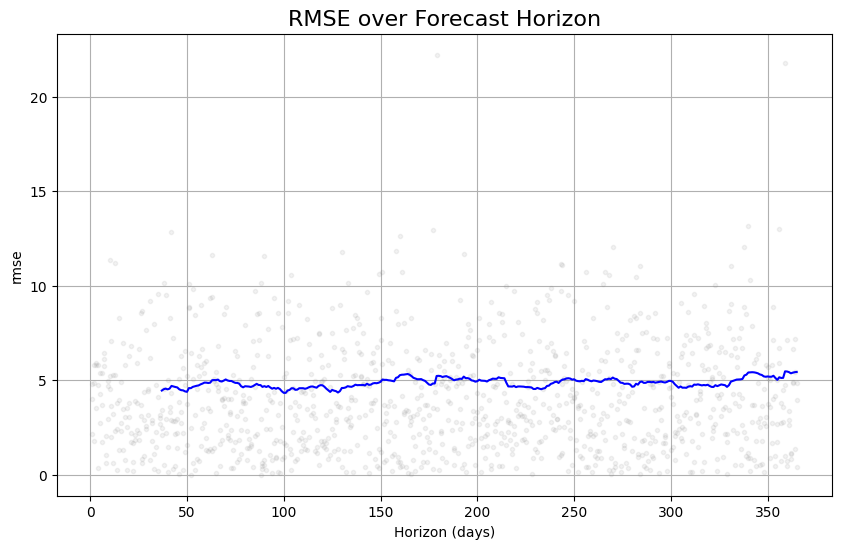

In [4]:
# 4. FORECASTING (Store 1, Item 1)
df_single_series = df[(df['store'] == 1) & (df['item'] == 1)]
df_prophet = df_single_series[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})
print(df_prophet.head())

model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

print("\nForecast preview:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = model.plot(forecast)
plt.title('Sales Forecast for Store 1, Item 1 (Next 365 Days)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.savefig('results/visualizations/final_forecast.png')
plt.show()

fig2 = model.plot_components(forecast)
plt.savefig('results/visualizations/forecast_components.png')
plt.show()

# cross-validation
df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print("\nModel Performance Metrics:")
print(df_p)

fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.title('RMSE over Forecast Horizon', fontsize=16)
plt.show()

In [5]:
# 5. BULK FORECASTING
start_time = time.time()
all_forecasts = []

stores = df['store'].unique()
items = df['item'].unique()
total_combinations = len(stores) * len(items)
current_combination = 0

for store_id in stores:
    # Loop through each item
    for item_id in items:
        current_combination += 1
        print(f"--- Forecasting for Store {store_id}, Item {item_id} ({current_combination}/{total_combinations}) ---")

        series_df = df[(df['store'] == store_id) & (df['item'] == item_id)]
        df_prophet = series_df[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

        model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        model.fit(df_prophet)

        future = model.make_future_dataframe(periods=365)
        forecast = model.predict(future)
        forecast['store'] = store_id
        forecast['item'] = item_id
        all_forecasts.append(forecast)

print("\nAll forecasts generated.")

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/oe24udli.json


--- Forecasting for Store 1, Item 1 (1/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ps99i3wu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27181', 'data', 'file=/tmp/tmpgaexswla/oe24udli.json', 'init=/tmp/tmpgaexswla/ps99i3wu.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1350v3gk/prophet_model-20250721151722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_xjq6lxo.json


--- Forecasting for Store 1, Item 2 (2/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uqibn5fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88859', 'data', 'file=/tmp/tmpgaexswla/_xjq6lxo.json', 'init=/tmp/tmpgaexswla/uqibn5fg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8t7mhkq2/prophet_model-20250721151723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mckayee3.json


--- Forecasting for Store 1, Item 3 (3/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/klef_51g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88946', 'data', 'file=/tmp/tmpgaexswla/mckayee3.json', 'init=/tmp/tmpgaexswla/klef_51g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8qql_n9l/prophet_model-20250721151724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ua0f22ii.json


--- Forecasting for Store 1, Item 4 (4/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/q0wfvp0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23411', 'data', 'file=/tmp/tmpgaexswla/ua0f22ii.json', 'init=/tmp/tmpgaexswla/q0wfvp0n.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljlctdlww/prophet_model-20250721151724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/awed8le6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1irse12c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 1, Item 5 (5/500) ---


15:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5t190nvh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1kxph_kf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84832', 'data', 'file=/tmp/tmpgaexswla/5t190nvh.json', 'init=/tmp/tmpgaexswla/1kxph_kf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modely072a6pl/prophet_model-20250721151726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 6 (6/500) ---


15:17:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zudqfpiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dbfes15y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97662', 'data', 'file=/tmp/tmpgaexswla/zudqfpiq.json', 'init=/tmp/tmpgaexswla/dbfes15y.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrfofm5gn/prophet_model-20250721151727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 7 (7/500) ---


15:17:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/16mf3ri3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v1u6quwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92131', 'data', 'file=/tmp/tmpgaexswla/16mf3ri3.json', 'init=/tmp/tmpgaexswla/v1u6quwr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0owi5m6k/prophet_model-20250721151727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 8 (8/500) ---


15:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/agay6lun.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u07xev5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31660', 'data', 'file=/tmp/tmpgaexswla/agay6lun.json', 'init=/tmp/tmpgaexswla/u07xev5u.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyijbovk0/prophet_model-20250721151728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 9 (9/500) ---


15:17:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u0drfi5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/p9dpt8zk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75117', 'data', 'file=/tmp/tmpgaexswla/u0drfi5y.json', 'init=/tmp/tmpgaexswla/p9dpt8zk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcg2ven6k/prophet_model-20250721151729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 10 (10/500) ---


15:17:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_nv5asej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/edpm21yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28462', 'data', 'file=/tmp/tmpgaexswla/_nv5asej.json', 'init=/tmp/tmpgaexswla/edpm21yi.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelurjji3pb/prophet_model-20250721151730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 11 (11/500) ---


15:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k09ipaw1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2d852j0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22568', 'data', 'file=/tmp/tmpgaexswla/k09ipaw1.json', 'init=/tmp/tmpgaexswla/2d852j0c.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9dbtfary/prophet_model-20250721151730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 12 (12/500) ---


15:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8qiam82k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j8gohei3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95500', 'data', 'file=/tmp/tmpgaexswla/8qiam82k.json', 'init=/tmp/tmpgaexswla/j8gohei3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelce6l7ai4/prophet_model-20250721151731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 13 (13/500) ---


15:17:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t00k1ihv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xyu_prlb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22711', 'data', 'file=/tmp/tmpgaexswla/t00k1ihv.json', 'init=/tmp/tmpgaexswla/xyu_prlb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelovyhjmje/prophet_model-20250721151732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 14 (14/500) ---


15:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_02c2z7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/r2r7orqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4984', 'data', 'file=/tmp/tmpgaexswla/_02c2z7o.json', 'init=/tmp/tmpgaexswla/r2r7orqa.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modele9rkw3kg/prophet_model-20250721151732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 15 (15/500) ---


15:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/phmgsrbv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_cjhaxs0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79276', 'data', 'file=/tmp/tmpgaexswla/phmgsrbv.json', 'init=/tmp/tmpgaexswla/_cjhaxs0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelu6vrgb4y/prophet_model-20250721151733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 16 (16/500) ---


15:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qe3aiw1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0mltp8xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4385', 'data', 'file=/tmp/tmpgaexswla/qe3aiw1w.json', 'init=/tmp/tmpgaexswla/0mltp8xb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeltcfdx5or/prophet_model-20250721151734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 17 (17/500) ---


15:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bjq1ffzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mpjh20fc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37029', 'data', 'file=/tmp/tmpgaexswla/bjq1ffzy.json', 'init=/tmp/tmpgaexswla/mpjh20fc.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelum_nlzju/prophet_model-20250721151734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 18 (18/500) ---


15:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m__v8sk1.json


--- Forecasting for Store 1, Item 19 (19/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3_jkq2s4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7592', 'data', 'file=/tmp/tmpgaexswla/m__v8sk1.json', 'init=/tmp/tmpgaexswla/3_jkq2s4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9hxu9pkg/prophet_model-20250721151735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qgb4xfdx.json


--- Forecasting for Store 1, Item 20 (20/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_3vkzwzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41805', 'data', 'file=/tmp/tmpgaexswla/qgb4xfdx.json', 'init=/tmp/tmpgaexswla/_3vkzwzp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeleyltrlub/prophet_model-20250721151736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s6fxr5yx.json


--- Forecasting for Store 1, Item 21 (21/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/c6drii9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60732', 'data', 'file=/tmp/tmpgaexswla/s6fxr5yx.json', 'init=/tmp/tmpgaexswla/c6drii9e.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model4t55yv7p/prophet_model-20250721151737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0b8b5zg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/oci9vdxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 1, Item 22 (22/500) ---


15:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/py45zphn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/980v236r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52344', 'data', 'file=/tmp/tmpgaexswla/py45zphn.json', 'init=/tmp/tmpgaexswla/980v236r.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelqhso2xxx/prophet_model-20250721151739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 23 (23/500) ---


15:17:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/slnkax3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wwyj0ym3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85222', 'data', 'file=/tmp/tmpgaexswla/slnkax3m.json', 'init=/tmp/tmpgaexswla/wwyj0ym3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelbz96j9kb/prophet_model-20250721151740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 24 (24/500) ---


15:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/oy99wn3x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0soh4nmh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70769', 'data', 'file=/tmp/tmpgaexswla/oy99wn3x.json', 'init=/tmp/tmpgaexswla/0soh4nmh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcw6xlj47/prophet_model-20250721151740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 25 (25/500) ---


15:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ee5opplr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/r22ci1g8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4591', 'data', 'file=/tmp/tmpgaexswla/ee5opplr.json', 'init=/tmp/tmpgaexswla/r22ci1g8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9fllnrmh/prophet_model-20250721151741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 26 (26/500) ---


15:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7wf_vjfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0gvr2ae5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38503', 'data', 'file=/tmp/tmpgaexswla/7wf_vjfv.json', 'init=/tmp/tmpgaexswla/0gvr2ae5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrth_5opy/prophet_model-20250721151742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 27 (27/500) ---


15:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z698es09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/awphh2fn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9047', 'data', 'file=/tmp/tmpgaexswla/z698es09.json', 'init=/tmp/tmpgaexswla/awphh2fn.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelsr6tyqx3/prophet_model-20250721151743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 28 (28/500) ---


15:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lgmf6prn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jc0usxj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58608', 'data', 'file=/tmp/tmpgaexswla/lgmf6prn.json', 'init=/tmp/tmpgaexswla/jc0usxj0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model6xzj0dns/prophet_model-20250721151743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 29 (29/500) ---


15:17:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ob9grkow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9l70ucdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13858', 'data', 'file=/tmp/tmpgaexswla/ob9grkow.json', 'init=/tmp/tmpgaexswla/9l70ucdy.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model680bgfl8/prophet_model-20250721151744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 30 (30/500) ---


15:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g6y52_5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j3k3vh9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28668', 'data', 'file=/tmp/tmpgaexswla/g6y52_5a.json', 'init=/tmp/tmpgaexswla/j3k3vh9g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelu2j60j8v/prophet_model-20250721151745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 31 (31/500) ---


15:17:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/82wom85k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1tka035u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69557', 'data', 'file=/tmp/tmpgaexswla/82wom85k.json', 'init=/tmp/tmpgaexswla/1tka035u.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2ad2lqq2/prophet_model-20250721151746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 32 (32/500) ---


15:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ir9rzl5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ejjobxx2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40718', 'data', 'file=/tmp/tmpgaexswla/ir9rzl5b.json', 'init=/tmp/tmpgaexswla/ejjobxx2.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_7_nq5z2/prophet_model-20250721151746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 33 (33/500) ---


15:17:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tmdi38ph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ybppx7c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12065', 'data', 'file=/tmp/tmpgaexswla/tmdi38ph.json', 'init=/tmp/tmpgaexswla/ybppx7c6.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelvifjskcm/prophet_model-20250721151747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 34 (34/500) ---


15:17:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0o6olgow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/77hu0lfc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37497', 'data', 'file=/tmp/tmpgaexswla/0o6olgow.json', 'init=/tmp/tmpgaexswla/77hu0lfc.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmrnj3j2w/prophet_model-20250721151748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 35 (35/500) ---


15:17:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ier0u3j6.json


--- Forecasting for Store 1, Item 36 (36/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bcc0o7j1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23910', 'data', 'file=/tmp/tmpgaexswla/ier0u3j6.json', 'init=/tmp/tmpgaexswla/bcc0o7j1.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeldyemqrh5/prophet_model-20250721151749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ia82cxs2.json


--- Forecasting for Store 1, Item 37 (37/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/e_e5kayu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96181', 'data', 'file=/tmp/tmpgaexswla/ia82cxs2.json', 'init=/tmp/tmpgaexswla/e_e5kayu.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljin6gbug/prophet_model-20250721151750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/64p542jo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9k1ttobm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 1, Item 38 (38/500) ---


15:17:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nfd0p0j2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/itd7ceid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62408', 'data', 'file=/tmp/tmpgaexswla/nfd0p0j2.json', 'init=/tmp/tmpgaexswla/itd7ceid.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelv08jybnf/prophet_model-20250721151752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 39 (39/500) ---


15:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/x8is9l_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ovaxdjrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61822', 'data', 'file=/tmp/tmpgaexswla/x8is9l_6.json', 'init=/tmp/tmpgaexswla/ovaxdjrh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2k73xtmf/prophet_model-20250721151752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 40 (40/500) ---


15:17:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/olg7yj3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/c2_ni3f3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78562', 'data', 'file=/tmp/tmpgaexswla/olg7yj3y.json', 'init=/tmp/tmpgaexswla/c2_ni3f3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelv3ldfui0/prophet_model-20250721151753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 41 (41/500) ---


15:17:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b8l2y5w0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s9k4fnq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60527', 'data', 'file=/tmp/tmpgaexswla/b8l2y5w0.json', 'init=/tmp/tmpgaexswla/s9k4fnq3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelx_tqgh9r/prophet_model-20250721151754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 42 (42/500) ---


15:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tddbq_yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ogbazauo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55287', 'data', 'file=/tmp/tmpgaexswla/tddbq_yz.json', 'init=/tmp/tmpgaexswla/ogbazauo.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwyznizgt/prophet_model-20250721151754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 43 (43/500) ---


15:17:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h9hn63_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qqtvei4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21054', 'data', 'file=/tmp/tmpgaexswla/h9hn63_m.json', 'init=/tmp/tmpgaexswla/qqtvei4m.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelsdc188ia/prophet_model-20250721151755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 44 (44/500) ---


15:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ecarvwvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qtmtvaqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5809', 'data', 'file=/tmp/tmpgaexswla/ecarvwvt.json', 'init=/tmp/tmpgaexswla/qtmtvaqr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_5m5w7xs/prophet_model-20250721151756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 45 (45/500) ---


15:17:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s7l8_cax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qknushru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9344', 'data', 'file=/tmp/tmpgaexswla/s7l8_cax.json', 'init=/tmp/tmpgaexswla/qknushru.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelkkcdeuwf/prophet_model-20250721151756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 46 (46/500) ---


15:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/muv9y3g3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ko0oyrpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18217', 'data', 'file=/tmp/tmpgaexswla/muv9y3g3.json', 'init=/tmp/tmpgaexswla/ko0oyrpi.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelur5bt7b1/prophet_model-20250721151757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 47 (47/500) ---


15:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/76vlmib3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fb8so3wc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50182', 'data', 'file=/tmp/tmpgaexswla/76vlmib3.json', 'init=/tmp/tmpgaexswla/fb8so3wc.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelez5df6oe/prophet_model-20250721151758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 48 (48/500) ---


15:17:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/newauppv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_nrndd2f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70218', 'data', 'file=/tmp/tmpgaexswla/newauppv.json', 'init=/tmp/tmpgaexswla/_nrndd2f.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnoeyjvp2/prophet_model-20250721151759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 49 (49/500) ---


15:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0kwkxrsz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6ic8avot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32337', 'data', 'file=/tmp/tmpgaexswla/0kwkxrsz.json', 'init=/tmp/tmpgaexswla/6ic8avot.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeleh1i1kn2/prophet_model-20250721151759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 1, Item 50 (50/500) ---


15:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/oym5r1_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n9bpqypo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17190', 'data', 'file=/tmp/tmpgaexswla/oym5r1_7.json', 'init=/tmp/tmpgaexswla/n9bpqypo.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelngpczzez/prophet_model-20250721151800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 1 (51/500) ---


15:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jrj3bss6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yvggn131.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5335', 'data', 'file=/tmp/tmpgaexswla/jrj3bss6.json', 'init=/tmp/tmpgaexswla/yvggn131.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1ymrdblp/prophet_model-20250721151801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 2 (52/500) ---


15:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nreznapc.json


--- Forecasting for Store 2, Item 3 (53/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s4otf_7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48186', 'data', 'file=/tmp/tmpgaexswla/nreznapc.json', 'init=/tmp/tmpgaexswla/s4otf_7w.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelhv2vdtix/prophet_model-20250721151802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/c21nn_fi.json


--- Forecasting for Store 2, Item 4 (54/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/f__2pgyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52186', 'data', 'file=/tmp/tmpgaexswla/c21nn_fi.json', 'init=/tmp/tmpgaexswla/f__2pgyg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelk599ds99/prophet_model-20250721151803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v71u06nk.json


--- Forecasting for Store 2, Item 5 (55/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bu1v6hdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16916', 'data', 'file=/tmp/tmpgaexswla/v71u06nk.json', 'init=/tmp/tmpgaexswla/bu1v6hdf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model43tq5id3/prophet_model-20250721151804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/92rfh2ry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/y809c29q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 2, Item 6 (56/500) ---


15:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v5oet0rv.json


--- Forecasting for Store 2, Item 7 (57/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/znse6ghv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36697', 'data', 'file=/tmp/tmpgaexswla/v5oet0rv.json', 'init=/tmp/tmpgaexswla/znse6ghv.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelciezmorz/prophet_model-20250721151805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ut603vfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/beupo42p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 2, Item 8 (58/500) ---


15:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uk_mqwze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d9o8jkgz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79280', 'data', 'file=/tmp/tmpgaexswla/uk_mqwze.json', 'init=/tmp/tmpgaexswla/d9o8jkgz.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwh_n5igm/prophet_model-20250721151807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 9 (59/500) ---


15:18:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rsgza6mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cyesy5_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76478', 'data', 'file=/tmp/tmpgaexswla/rsgza6mc.json', 'init=/tmp/tmpgaexswla/cyesy5_r.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfmzvds3d/prophet_model-20250721151808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 10 (60/500) ---


15:18:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s3czezhs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/run1xt_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59628', 'data', 'file=/tmp/tmpgaexswla/s3czezhs.json', 'init=/tmp/tmpgaexswla/run1xt_o.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelb6r1831f/prophet_model-20250721151808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 11 (61/500) ---


15:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4j7ddy8z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fs5o6smw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49886', 'data', 'file=/tmp/tmpgaexswla/4j7ddy8z.json', 'init=/tmp/tmpgaexswla/fs5o6smw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model4ycsyoun/prophet_model-20250721151809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 12 (62/500) ---


15:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/acz5xxu3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b7as2dmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56057', 'data', 'file=/tmp/tmpgaexswla/acz5xxu3.json', 'init=/tmp/tmpgaexswla/b7as2dmu.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelz5174ve4/prophet_model-20250721151810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 13 (63/500) ---


15:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/849r3v7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dtg08e1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76317', 'data', 'file=/tmp/tmpgaexswla/849r3v7y.json', 'init=/tmp/tmpgaexswla/dtg08e1z.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeloszl62_8/prophet_model-20250721151811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 14 (64/500) ---


15:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8s332yrg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d4ke1kol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36558', 'data', 'file=/tmp/tmpgaexswla/8s332yrg.json', 'init=/tmp/tmpgaexswla/d4ke1kol.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model7_gn6a1g/prophet_model-20250721151811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 15 (65/500) ---


15:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2vcwpv7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l12xb7p2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94557', 'data', 'file=/tmp/tmpgaexswla/2vcwpv7l.json', 'init=/tmp/tmpgaexswla/l12xb7p2.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelloptucmr/prophet_model-20250721151812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 16 (66/500) ---


15:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0tcwufy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/e6ihygm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93296', 'data', 'file=/tmp/tmpgaexswla/0tcwufy2.json', 'init=/tmp/tmpgaexswla/e6ihygm0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelkmi1nale/prophet_model-20250721151813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 17 (67/500) ---


15:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/f02ck6yw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0m6fd02u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60457', 'data', 'file=/tmp/tmpgaexswla/f02ck6yw.json', 'init=/tmp/tmpgaexswla/0m6fd02u.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeld2kj_03g/prophet_model-20250721151813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 18 (68/500) ---


15:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/eby8yjoo.json


--- Forecasting for Store 2, Item 19 (69/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1f_tai5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69974', 'data', 'file=/tmp/tmpgaexswla/eby8yjoo.json', 'init=/tmp/tmpgaexswla/1f_tai5u.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model35nxv35r/prophet_model-20250721151814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/a5aueo0y.json


--- Forecasting for Store 2, Item 20 (70/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7y59h3pk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57887', 'data', 'file=/tmp/tmpgaexswla/a5aueo0y.json', 'init=/tmp/tmpgaexswla/7y59h3pk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_d8mqf85/prophet_model-20250721151815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k9eh2c7i.json


--- Forecasting for Store 2, Item 21 (71/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6rx62wdr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=488', 'data', 'file=/tmp/tmpgaexswla/k9eh2c7i.json', 'init=/tmp/tmpgaexswla/6rx62wdr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeluriekrnv/prophet_model-20250721151816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_ukxuol5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lpy7m024.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin

--- Forecasting for Store 2, Item 22 (72/500) ---


15:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9_fu3_a2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u1hz24xs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10341', 'data', 'file=/tmp/tmpgaexswla/9_fu3_a2.json', 'init=/tmp/tmpgaexswla/u1hz24xs.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelsuw6mnah/prophet_model-20250721151818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 23 (73/500) ---


15:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rs0fyusj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tl2osx6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21509', 'data', 'file=/tmp/tmpgaexswla/rs0fyusj.json', 'init=/tmp/tmpgaexswla/tl2osx6_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelf009l9bu/prophet_model-20250721151819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 24 (74/500) ---


15:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vlv4q83w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fyi1h3y5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12587', 'data', 'file=/tmp/tmpgaexswla/vlv4q83w.json', 'init=/tmp/tmpgaexswla/fyi1h3y5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgupi3jiy/prophet_model-20250721151819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 25 (75/500) ---


15:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2j7mesyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w9_ozz4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45498', 'data', 'file=/tmp/tmpgaexswla/2j7mesyn.json', 'init=/tmp/tmpgaexswla/w9_ozz4_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model46a4g9fu/prophet_model-20250721151820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 26 (76/500) ---


15:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/it676kq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/02t_890_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95852', 'data', 'file=/tmp/tmpgaexswla/it676kq9.json', 'init=/tmp/tmpgaexswla/02t_890_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelvaumjp8s/prophet_model-20250721151821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 27 (77/500) ---


15:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s4wnmq3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z9734vge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59895', 'data', 'file=/tmp/tmpgaexswla/s4wnmq3p.json', 'init=/tmp/tmpgaexswla/z9734vge.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1p8e_qk6/prophet_model-20250721151822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 28 (78/500) ---


15:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/79xsqtv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/aio_otkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55566', 'data', 'file=/tmp/tmpgaexswla/79xsqtv8.json', 'init=/tmp/tmpgaexswla/aio_otkp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelttmv38qv/prophet_model-20250721151823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 29 (79/500) ---


15:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vz0ofxfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d_2oosao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4287', 'data', 'file=/tmp/tmpgaexswla/vz0ofxfv.json', 'init=/tmp/tmpgaexswla/d_2oosao.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelm85tq3_u/prophet_model-20250721151823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 30 (80/500) ---


15:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/og2wn7ka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/awjeq6li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2413', 'data', 'file=/tmp/tmpgaexswla/og2wn7ka.json', 'init=/tmp/tmpgaexswla/awjeq6li.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpp7wta6n/prophet_model-20250721151824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 31 (81/500) ---


15:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/18hjafym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ue33y8do.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42856', 'data', 'file=/tmp/tmpgaexswla/18hjafym.json', 'init=/tmp/tmpgaexswla/ue33y8do.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelx84vf8sv/prophet_model-20250721151825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 32 (82/500) ---


15:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dq3gsa6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hxcpvkdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99777', 'data', 'file=/tmp/tmpgaexswla/dq3gsa6l.json', 'init=/tmp/tmpgaexswla/hxcpvkdc.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelodgkr3_b/prophet_model-20250721151826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 33 (83/500) ---


15:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0u4hnms6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1xoun4i3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81909', 'data', 'file=/tmp/tmpgaexswla/0u4hnms6.json', 'init=/tmp/tmpgaexswla/1xoun4i3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelbw1rp3ln/prophet_model-20250721151826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 34 (84/500) ---


15:18:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/iif7u77n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yzreiexq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62998', 'data', 'file=/tmp/tmpgaexswla/iif7u77n.json', 'init=/tmp/tmpgaexswla/yzreiexq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeli92jfd4f/prophet_model-20250721151827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 35 (85/500) ---


15:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yjcgp8fd.json


--- Forecasting for Store 2, Item 36 (86/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hjwh5ag9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59364', 'data', 'file=/tmp/tmpgaexswla/yjcgp8fd.json', 'init=/tmp/tmpgaexswla/hjwh5ag9.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwnn6hre3/prophet_model-20250721151828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/35gvt0z6.json


--- Forecasting for Store 2, Item 37 (87/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wlbhgj3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85697', 'data', 'file=/tmp/tmpgaexswla/35gvt0z6.json', 'init=/tmp/tmpgaexswla/wlbhgj3h.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelr1rcjtwo/prophet_model-20250721151829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k40cq9dv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rzv57rd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 2, Item 38 (88/500) ---


15:18:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/37i2s5gc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tqr7fysv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73360', 'data', 'file=/tmp/tmpgaexswla/37i2s5gc.json', 'init=/tmp/tmpgaexswla/tqr7fysv.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5ttrldms/prophet_model-20250721151831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 39 (89/500) ---


15:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g9r9w06g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k_5_ohue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33369', 'data', 'file=/tmp/tmpgaexswla/g9r9w06g.json', 'init=/tmp/tmpgaexswla/k_5_ohue.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelxow8twq8/prophet_model-20250721151832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 40 (90/500) ---


15:18:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/me29oea4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nmp_jfnw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62513', 'data', 'file=/tmp/tmpgaexswla/me29oea4.json', 'init=/tmp/tmpgaexswla/nmp_jfnw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljcgs4wq4/prophet_model-20250721151832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 41 (91/500) ---


15:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u7ir_6qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qw247tpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83237', 'data', 'file=/tmp/tmpgaexswla/u7ir_6qv.json', 'init=/tmp/tmpgaexswla/qw247tpl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelt8uvurks/prophet_model-20250721151833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 42 (92/500) ---


15:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dho1ej2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0ovskzdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97498', 'data', 'file=/tmp/tmpgaexswla/dho1ej2v.json', 'init=/tmp/tmpgaexswla/0ovskzdb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelxvilo1bs/prophet_model-20250721151834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 43 (93/500) ---


15:18:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6kcdcs70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/05duos_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91761', 'data', 'file=/tmp/tmpgaexswla/6kcdcs70.json', 'init=/tmp/tmpgaexswla/05duos_p.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelre4p6t42/prophet_model-20250721151835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 44 (94/500) ---


15:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4xip0bz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1hzlm9gy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31824', 'data', 'file=/tmp/tmpgaexswla/4xip0bz0.json', 'init=/tmp/tmpgaexswla/1hzlm9gy.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeloqzhr4ug/prophet_model-20250721151835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 45 (95/500) ---


15:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sjg5piop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j48dibl3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65762', 'data', 'file=/tmp/tmpgaexswla/sjg5piop.json', 'init=/tmp/tmpgaexswla/j48dibl3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelr_tpmuns/prophet_model-20250721151836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 46 (96/500) ---


15:18:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0s7k_lvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_5ja5kvw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3667', 'data', 'file=/tmp/tmpgaexswla/0s7k_lvz.json', 'init=/tmp/tmpgaexswla/_5ja5kvw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelles14wgm/prophet_model-20250721151837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 47 (97/500) ---


15:18:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/f_72gjnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9vmq77s8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7183', 'data', 'file=/tmp/tmpgaexswla/f_72gjnc.json', 'init=/tmp/tmpgaexswla/9vmq77s8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelh6u2e58c/prophet_model-20250721151837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 48 (98/500) ---


15:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0med1z3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gt16p91s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25757', 'data', 'file=/tmp/tmpgaexswla/0med1z3m.json', 'init=/tmp/tmpgaexswla/gt16p91s.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeli9t3_k8m/prophet_model-20250721151838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 49 (99/500) ---


15:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0ppi51p5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/95tleov4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49381', 'data', 'file=/tmp/tmpgaexswla/0ppi51p5.json', 'init=/tmp/tmpgaexswla/95tleov4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeli07l7q8m/prophet_model-20250721151839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 2, Item 50 (100/500) ---


15:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ikg7cvy4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kzbxifxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51959', 'data', 'file=/tmp/tmpgaexswla/ikg7cvy4.json', 'init=/tmp/tmpgaexswla/kzbxifxn.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelegicch24/prophet_model-20250721151840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 1 (101/500) ---


15:18:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uexhlaab.json


--- Forecasting for Store 3, Item 2 (102/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5g4a_l4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21893', 'data', 'file=/tmp/tmpgaexswla/uexhlaab.json', 'init=/tmp/tmpgaexswla/5g4a_l4s.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwy11qobg/prophet_model-20250721151840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5nlk9q2v.json


--- Forecasting for Store 3, Item 3 (103/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lxlwbqlx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44967', 'data', 'file=/tmp/tmpgaexswla/5nlk9q2v.json', 'init=/tmp/tmpgaexswla/lxlwbqlx.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpjqb9qzj/prophet_model-20250721151841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nn46d3sl.json


--- Forecasting for Store 3, Item 4 (104/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/o6nygmz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86949', 'data', 'file=/tmp/tmpgaexswla/nn46d3sl.json', 'init=/tmp/tmpgaexswla/o6nygmz3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgciq5s8z/prophet_model-20250721151842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rdg2qxpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2pxlm_lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 3, Item 5 (105/500) ---


15:18:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7tlrin6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b1oybnqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59201', 'data', 'file=/tmp/tmpgaexswla/7tlrin6e.json', 'init=/tmp/tmpgaexswla/b1oybnqf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelujm6xc7l/prophet_model-20250721151844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 6 (106/500) ---


15:18:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lqh25m9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/587ptqpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36325', 'data', 'file=/tmp/tmpgaexswla/lqh25m9m.json', 'init=/tmp/tmpgaexswla/587ptqpn.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljr4emw_k/prophet_model-20250721151845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 7 (107/500) ---


15:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sn7zldaw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uje64jv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54714', 'data', 'file=/tmp/tmpgaexswla/sn7zldaw.json', 'init=/tmp/tmpgaexswla/uje64jv1.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelhypaceuk/prophet_model-20250721151845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 8 (108/500) ---


15:18:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g5f21beg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b7qtpcjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57854', 'data', 'file=/tmp/tmpgaexswla/g5f21beg.json', 'init=/tmp/tmpgaexswla/b7qtpcjl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3myx2x7z/prophet_model-20250721151846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 9 (109/500) ---


15:18:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uqju404z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7bpg4wrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=384', 'data', 'file=/tmp/tmpgaexswla/uqju404z.json', 'init=/tmp/tmpgaexswla/7bpg4wrk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelv5_qm9k5/prophet_model-20250721151847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 10 (110/500) ---


15:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ybp2v_ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ue_7yrrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41564', 'data', 'file=/tmp/tmpgaexswla/ybp2v_ep.json', 'init=/tmp/tmpgaexswla/ue_7yrrj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9luwmtx0/prophet_model-20250721151848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 11 (111/500) ---


15:18:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2d_elvgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kxj0za8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69253', 'data', 'file=/tmp/tmpgaexswla/2d_elvgr.json', 'init=/tmp/tmpgaexswla/kxj0za8c.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcq4_ofv6/prophet_model-20250721151848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 12 (112/500) ---


15:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dpnbxqej.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sxp10hef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96179', 'data', 'file=/tmp/tmpgaexswla/dpnbxqej.json', 'init=/tmp/tmpgaexswla/sxp10hef.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3iy2eb_z/prophet_model-20250721151849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 13 (113/500) ---


15:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cm7h6zjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4yrg5ac3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50735', 'data', 'file=/tmp/tmpgaexswla/cm7h6zjt.json', 'init=/tmp/tmpgaexswla/4yrg5ac3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8fqytdy2/prophet_model-20250721151850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 14 (114/500) ---


15:18:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m2ek3ovv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7tbg0ecj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17792', 'data', 'file=/tmp/tmpgaexswla/m2ek3ovv.json', 'init=/tmp/tmpgaexswla/7tbg0ecj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modell7zduo9e/prophet_model-20250721151851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 15 (115/500) ---


15:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/svlk9g2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ofas0u7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37960', 'data', 'file=/tmp/tmpgaexswla/svlk9g2p.json', 'init=/tmp/tmpgaexswla/ofas0u7z.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeld7iy58kn/prophet_model-20250721151851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 16 (116/500) ---


15:18:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8a1gejen.json


--- Forecasting for Store 3, Item 17 (117/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rcimalk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15411', 'data', 'file=/tmp/tmpgaexswla/8a1gejen.json', 'init=/tmp/tmpgaexswla/rcimalk2.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgp1kxvcg/prophet_model-20250721151852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ei83mich.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_v3rbuf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 3, Item 18 (118/500) ---


15:18:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/coqstboc.json


--- Forecasting for Store 3, Item 19 (119/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hk0i7u24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3183', 'data', 'file=/tmp/tmpgaexswla/coqstboc.json', 'init=/tmp/tmpgaexswla/hk0i7u24.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyq2hf46p/prophet_model-20250721151854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h84telml.json


--- Forecasting for Store 3, Item 20 (120/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7xhv06hf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82804', 'data', 'file=/tmp/tmpgaexswla/h84telml.json', 'init=/tmp/tmpgaexswla/7xhv06hf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljcqm6b8a/prophet_model-20250721151855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vvgm3vpr.json


--- Forecasting for Store 3, Item 21 (121/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/avmbcerr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49341', 'data', 'file=/tmp/tmpgaexswla/vvgm3vpr.json', 'init=/tmp/tmpgaexswla/avmbcerr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwszbz8b0/prophet_model-20250721151856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u6nsqq5t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6ovsvfvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 3, Item 22 (122/500) ---


15:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zpbgfv29.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pal42eh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2654', 'data', 'file=/tmp/tmpgaexswla/zpbgfv29.json', 'init=/tmp/tmpgaexswla/pal42eh2.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeldunu1zz1/prophet_model-20250721151857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 23 (123/500) ---


15:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pdrk_zsv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u_3hljg_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97412', 'data', 'file=/tmp/tmpgaexswla/pdrk_zsv.json', 'init=/tmp/tmpgaexswla/u_3hljg_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model22_9q0lc/prophet_model-20250721151858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 24 (124/500) ---


15:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/onjquh0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h_cgmdx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83603', 'data', 'file=/tmp/tmpgaexswla/onjquh0b.json', 'init=/tmp/tmpgaexswla/h_cgmdx1.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelphde4eog/prophet_model-20250721151859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 25 (125/500) ---


15:18:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zw256rpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z7croc35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79535', 'data', 'file=/tmp/tmpgaexswla/zw256rpv.json', 'init=/tmp/tmpgaexswla/z7croc35.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8kufaxfr/prophet_model-20250721151900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 26 (126/500) ---


15:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tyhsnzz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5lzdtefe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1354', 'data', 'file=/tmp/tmpgaexswla/tyhsnzz5.json', 'init=/tmp/tmpgaexswla/5lzdtefe.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelplexq9bx/prophet_model-20250721151900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 27 (127/500) ---


15:19:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1gwkjos9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hyc1wzje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24871', 'data', 'file=/tmp/tmpgaexswla/1gwkjos9.json', 'init=/tmp/tmpgaexswla/hyc1wzje.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelza_wvy_e/prophet_model-20250721151901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 28 (128/500) ---


15:19:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/km_xb0fv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ff3tppq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48438', 'data', 'file=/tmp/tmpgaexswla/km_xb0fv.json', 'init=/tmp/tmpgaexswla/ff3tppq3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modela9xcvjzb/prophet_model-20250721151902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 29 (129/500) ---


15:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rmywd6kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v5kweln5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57372', 'data', 'file=/tmp/tmpgaexswla/rmywd6kp.json', 'init=/tmp/tmpgaexswla/v5kweln5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model67yk8mic/prophet_model-20250721151903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 30 (130/500) ---


15:19:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gigbd4x8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zjnefnu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14981', 'data', 'file=/tmp/tmpgaexswla/gigbd4x8.json', 'init=/tmp/tmpgaexswla/zjnefnu7.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeluq7tavu3/prophet_model-20250721151903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 31 (131/500) ---


15:19:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hu8qxclu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/p_u6wwf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68767', 'data', 'file=/tmp/tmpgaexswla/hu8qxclu.json', 'init=/tmp/tmpgaexswla/p_u6wwf1.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9ohgooyb/prophet_model-20250721151904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 32 (132/500) ---


15:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xhjwfev5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mlb4n2d8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26383', 'data', 'file=/tmp/tmpgaexswla/xhjwfev5.json', 'init=/tmp/tmpgaexswla/mlb4n2d8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelf1wkwmqx/prophet_model-20250721151905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 33 (133/500) ---


15:19:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/znu_w693.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vk2k4a5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76393', 'data', 'file=/tmp/tmpgaexswla/znu_w693.json', 'init=/tmp/tmpgaexswla/vk2k4a5l.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrrnglnyb/prophet_model-20250721151905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 34 (134/500) ---


15:19:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7hvqqou_.json


--- Forecasting for Store 3, Item 35 (135/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xw6j6w5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83401', 'data', 'file=/tmp/tmpgaexswla/7hvqqou_.json', 'init=/tmp/tmpgaexswla/xw6j6w5t.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljbzgg03j/prophet_model-20250721151906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2_opo_6n.json


--- Forecasting for Store 3, Item 36 (136/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/i50fems5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6010', 'data', 'file=/tmp/tmpgaexswla/2_opo_6n.json', 'init=/tmp/tmpgaexswla/i50fems5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model44udxebz/prophet_model-20250721151907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1jgwz97z.json


--- Forecasting for Store 3, Item 37 (137/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sqc1qqkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33474', 'data', 'file=/tmp/tmpgaexswla/1jgwz97z.json', 'init=/tmp/tmpgaexswla/sqc1qqkj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model6j7hwpbz/prophet_model-20250721151908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qr6uydb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jjpgs0cq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 3, Item 38 (138/500) ---


15:19:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h2vq4kt9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zb3atjyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90460', 'data', 'file=/tmp/tmpgaexswla/h2vq4kt9.json', 'init=/tmp/tmpgaexswla/zb3atjyf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelz6q6zgxx/prophet_model-20250721151910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 39 (139/500) ---


15:19:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/otd36e40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/epfidjjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63485', 'data', 'file=/tmp/tmpgaexswla/otd36e40.json', 'init=/tmp/tmpgaexswla/epfidjjj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwmlns7av/prophet_model-20250721151911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 40 (140/500) ---


15:19:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hz02sigb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ssbol1ea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79232', 'data', 'file=/tmp/tmpgaexswla/hz02sigb.json', 'init=/tmp/tmpgaexswla/ssbol1ea.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model7n337oe2/prophet_model-20250721151911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 41 (141/500) ---


15:19:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h091w0_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/p5jt_bt4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67501', 'data', 'file=/tmp/tmpgaexswla/h091w0_o.json', 'init=/tmp/tmpgaexswla/p5jt_bt4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_models8023wzh/prophet_model-20250721151912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 42 (142/500) ---


15:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/se41nb4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8e7fj058.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17250', 'data', 'file=/tmp/tmpgaexswla/se41nb4i.json', 'init=/tmp/tmpgaexswla/8e7fj058.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeltekwqryt/prophet_model-20250721151913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 43 (143/500) ---


15:19:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t0ildpcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gmqw9b_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65640', 'data', 'file=/tmp/tmpgaexswla/t0ildpcj.json', 'init=/tmp/tmpgaexswla/gmqw9b_w.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelng1ex76_/prophet_model-20250721151913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 44 (144/500) ---


15:19:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/shqnuoty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5cns08cz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58523', 'data', 'file=/tmp/tmpgaexswla/shqnuoty.json', 'init=/tmp/tmpgaexswla/5cns08cz.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model7izj8ftr/prophet_model-20250721151914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 45 (145/500) ---


15:19:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/x2aj_amr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v1tpndn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71608', 'data', 'file=/tmp/tmpgaexswla/x2aj_amr.json', 'init=/tmp/tmpgaexswla/v1tpndn5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelus_ksp_j/prophet_model-20250721151915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 46 (146/500) ---


15:19:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_dyb_wgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xt63_xwj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49270', 'data', 'file=/tmp/tmpgaexswla/_dyb_wgk.json', 'init=/tmp/tmpgaexswla/xt63_xwj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8suljk_i/prophet_model-20250721151916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 47 (147/500) ---


15:19:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1__anqfb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/chf5mr3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38792', 'data', 'file=/tmp/tmpgaexswla/1__anqfb.json', 'init=/tmp/tmpgaexswla/chf5mr3o.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model54hd9l0j/prophet_model-20250721151916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 3, Item 48 (148/500) ---


15:19:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ua_4fu6v.json


--- Forecasting for Store 3, Item 49 (149/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ki4078yj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60743', 'data', 'file=/tmp/tmpgaexswla/ua_4fu6v.json', 'init=/tmp/tmpgaexswla/ki4078yj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model7cbit8ku/prophet_model-20250721151917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8w7pz9rj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/o_6l4kyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 3, Item 50 (150/500) ---


15:19:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qll1hcq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/81kunas1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58346', 'data', 'file=/tmp/tmpgaexswla/qll1hcq1.json', 'init=/tmp/tmpgaexswla/81kunas1.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelda1b5v0e/prophet_model-20250721151919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 1 (151/500) ---


15:19:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rqzjw9p6.json


--- Forecasting for Store 4, Item 2 (152/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7rjtmruo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21388', 'data', 'file=/tmp/tmpgaexswla/rqzjw9p6.json', 'init=/tmp/tmpgaexswla/7rjtmruo.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelr9g_6xes/prophet_model-20250721151920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dhbe3mty.json


--- Forecasting for Store 4, Item 3 (153/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/q_rh6px7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31938', 'data', 'file=/tmp/tmpgaexswla/dhbe3mty.json', 'init=/tmp/tmpgaexswla/q_rh6px7.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeln2kafpzq/prophet_model-20250721151921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u5coongs.json


--- Forecasting for Store 4, Item 4 (154/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v4vkmz1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88245', 'data', 'file=/tmp/tmpgaexswla/u5coongs.json', 'init=/tmp/tmpgaexswla/v4vkmz1_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model182ktcew/prophet_model-20250721151922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5314fxm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bmj21u6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 4, Item 5 (155/500) ---


15:19:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_wiyqoi3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3r3afkdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8221', 'data', 'file=/tmp/tmpgaexswla/_wiyqoi3.json', 'init=/tmp/tmpgaexswla/3r3afkdl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9n0btugw/prophet_model-20250721151923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 6 (156/500) ---


15:19:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ks8p_fuw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/74dafgfm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2017', 'data', 'file=/tmp/tmpgaexswla/ks8p_fuw.json', 'init=/tmp/tmpgaexswla/74dafgfm.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelj4sak3e_/prophet_model-20250721151924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 7 (157/500) ---


15:19:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/48gadmmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/p6xxlgvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49143', 'data', 'file=/tmp/tmpgaexswla/48gadmmr.json', 'init=/tmp/tmpgaexswla/p6xxlgvp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelriyywubu/prophet_model-20250721151925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 8 (158/500) ---


15:19:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mjiq44gs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t0phhfq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27956', 'data', 'file=/tmp/tmpgaexswla/mjiq44gs.json', 'init=/tmp/tmpgaexswla/t0phhfq0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelotz0mj0i/prophet_model-20250721151925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 9 (159/500) ---


15:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/evq8gv53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v_vedl6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74080', 'data', 'file=/tmp/tmpgaexswla/evq8gv53.json', 'init=/tmp/tmpgaexswla/v_vedl6a.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeloy6wijdu/prophet_model-20250721151926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 10 (160/500) ---


15:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kz0tqge_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ejp8a1d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63380', 'data', 'file=/tmp/tmpgaexswla/kz0tqge_.json', 'init=/tmp/tmpgaexswla/ejp8a1d3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelbip6967w/prophet_model-20250721151927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 11 (161/500) ---


15:19:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/axhzr0ft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g5ipm_ys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61608', 'data', 'file=/tmp/tmpgaexswla/axhzr0ft.json', 'init=/tmp/tmpgaexswla/g5ipm_ys.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model84k57bku/prophet_model-20250721151928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 12 (162/500) ---


15:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ace4y48t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gkpubznv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45868', 'data', 'file=/tmp/tmpgaexswla/ace4y48t.json', 'init=/tmp/tmpgaexswla/gkpubznv.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelu3qzstp0/prophet_model-20250721151928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 13 (163/500) ---


15:19:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9pyqq0bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rv9gyo7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38684', 'data', 'file=/tmp/tmpgaexswla/9pyqq0bx.json', 'init=/tmp/tmpgaexswla/rv9gyo7a.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrfdj057q/prophet_model-20250721151929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 14 (164/500) ---


15:19:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vkg4tjvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/163hjpp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3839', 'data', 'file=/tmp/tmpgaexswla/vkg4tjvg.json', 'init=/tmp/tmpgaexswla/163hjpp9.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelg75hc7ml/prophet_model-20250721151930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 15 (165/500) ---


15:19:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jfi__uwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2oponuuh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10819', 'data', 'file=/tmp/tmpgaexswla/jfi__uwq.json', 'init=/tmp/tmpgaexswla/2oponuuh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwletnivb/prophet_model-20250721151930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 16 (166/500) ---


15:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/47z62j7u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/njbh35v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39715', 'data', 'file=/tmp/tmpgaexswla/47z62j7u.json', 'init=/tmp/tmpgaexswla/njbh35v9.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2tq0xnyq/prophet_model-20250721151931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 17 (167/500) ---


15:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_v54v51e.json


--- Forecasting for Store 4, Item 18 (168/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mamw6ynl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88624', 'data', 'file=/tmp/tmpgaexswla/_v54v51e.json', 'init=/tmp/tmpgaexswla/mamw6ynl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwtty80v0/prophet_model-20250721151932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5s13kzgv.json


--- Forecasting for Store 4, Item 19 (169/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tp25g2b_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43651', 'data', 'file=/tmp/tmpgaexswla/5s13kzgv.json', 'init=/tmp/tmpgaexswla/tp25g2b_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelico02jpn/prophet_model-20250721151933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cmuyhqe3.json


--- Forecasting for Store 4, Item 20 (170/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mtsye1vp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57913', 'data', 'file=/tmp/tmpgaexswla/cmuyhqe3.json', 'init=/tmp/tmpgaexswla/mtsye1vp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpzylld79/prophet_model-20250721151934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/27rjcxlp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pj2irpef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 4, Item 21 (171/500) ---


15:19:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8wx0fss6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cmgnf8t5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10860', 'data', 'file=/tmp/tmpgaexswla/8wx0fss6.json', 'init=/tmp/tmpgaexswla/cmgnf8t5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelvj3y7ebg/prophet_model-20250721151936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 22 (172/500) ---


15:19:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0v8c7_2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/e4eircix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33850', 'data', 'file=/tmp/tmpgaexswla/0v8c7_2h.json', 'init=/tmp/tmpgaexswla/e4eircix.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellpld41f0/prophet_model-20250721151936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 23 (173/500) ---


15:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gyosqof3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/r66xdyx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80870', 'data', 'file=/tmp/tmpgaexswla/gyosqof3.json', 'init=/tmp/tmpgaexswla/r66xdyx1.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model965srp0h/prophet_model-20250721151937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 24 (174/500) ---


15:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/17cbrhkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u_yj5l5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34653', 'data', 'file=/tmp/tmpgaexswla/17cbrhkf.json', 'init=/tmp/tmpgaexswla/u_yj5l5w.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelx4ezurrx/prophet_model-20250721151938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 25 (175/500) ---


15:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l00m9wy7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dgtodwmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31844', 'data', 'file=/tmp/tmpgaexswla/l00m9wy7.json', 'init=/tmp/tmpgaexswla/dgtodwmt.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljl8ogge4/prophet_model-20250721151939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 26 (176/500) ---


15:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gda17ftj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l4sl1xpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8292', 'data', 'file=/tmp/tmpgaexswla/gda17ftj.json', 'init=/tmp/tmpgaexswla/l4sl1xpg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelbcq_dsfy/prophet_model-20250721151939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 27 (177/500) ---


15:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/aaj9zd97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v0j84vfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7498', 'data', 'file=/tmp/tmpgaexswla/aaj9zd97.json', 'init=/tmp/tmpgaexswla/v0j84vfb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeliuceww34/prophet_model-20250721151940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 28 (178/500) ---


15:19:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5q7ms0lp.json


--- Forecasting for Store 4, Item 29 (179/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4id08s70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93306', 'data', 'file=/tmp/tmpgaexswla/5q7ms0lp.json', 'init=/tmp/tmpgaexswla/4id08s70.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelg0du4kmy/prophet_model-20250721151941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mfpt3ie_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bkd77xje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 4, Item 30 (180/500) ---


15:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wr4mdor1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jb723qaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97933', 'data', 'file=/tmp/tmpgaexswla/wr4mdor1.json', 'init=/tmp/tmpgaexswla/jb723qaw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelilh_glyw/prophet_model-20250721151942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 31 (181/500) ---


15:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ar4etz2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0faovttb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18086', 'data', 'file=/tmp/tmpgaexswla/ar4etz2y.json', 'init=/tmp/tmpgaexswla/0faovttb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwbapdu9u/prophet_model-20250721151943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 32 (182/500) ---


15:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3e31yy8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fcguwpfj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89355', 'data', 'file=/tmp/tmpgaexswla/3e31yy8h.json', 'init=/tmp/tmpgaexswla/fcguwpfj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelaq2b0ko7/prophet_model-20250721151944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 33 (183/500) ---


15:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ktpriipy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_hyywh9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69234', 'data', 'file=/tmp/tmpgaexswla/ktpriipy.json', 'init=/tmp/tmpgaexswla/_hyywh9a.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelqg80609d/prophet_model-20250721151944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 34 (184/500) ---


15:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wbe0_dxg.json


--- Forecasting for Store 4, Item 35 (185/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5cm9wx3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61467', 'data', 'file=/tmp/tmpgaexswla/wbe0_dxg.json', 'init=/tmp/tmpgaexswla/5cm9wx3l.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelx1arof4b/prophet_model-20250721151945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/adtrsvb5.json


--- Forecasting for Store 4, Item 36 (186/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n23zrl3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13623', 'data', 'file=/tmp/tmpgaexswla/adtrsvb5.json', 'init=/tmp/tmpgaexswla/n23zrl3a.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model6vflfh2x/prophet_model-20250721151946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bpdtsiri.json


--- Forecasting for Store 4, Item 37 (187/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/f_aof6sl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98093', 'data', 'file=/tmp/tmpgaexswla/bpdtsiri.json', 'init=/tmp/tmpgaexswla/f_aof6sl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_models4su_vpo/prophet_model-20250721151947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g2mklcug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/00fexfm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 4, Item 38 (188/500) ---


15:19:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zxv4jgl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/40095amh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75082', 'data', 'file=/tmp/tmpgaexswla/zxv4jgl9.json', 'init=/tmp/tmpgaexswla/40095amh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgt1r36q9/prophet_model-20250721151949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 39 (189/500) ---


15:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nyphd81f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kr9856wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50758', 'data', 'file=/tmp/tmpgaexswla/nyphd81f.json', 'init=/tmp/tmpgaexswla/kr9856wi.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwalf950m/prophet_model-20250721151949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 40 (190/500) ---


15:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kkxpufh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sf46wqwe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4406', 'data', 'file=/tmp/tmpgaexswla/kkxpufh5.json', 'init=/tmp/tmpgaexswla/sf46wqwe.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelr9yx0iic/prophet_model-20250721151950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 41 (191/500) ---


15:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1xpv8a2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/shubh2jz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67668', 'data', 'file=/tmp/tmpgaexswla/1xpv8a2b.json', 'init=/tmp/tmpgaexswla/shubh2jz.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgt5e9xuf/prophet_model-20250721151951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 42 (192/500) ---


15:19:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nbvfmmgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cfmwcmv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38515', 'data', 'file=/tmp/tmpgaexswla/nbvfmmgk.json', 'init=/tmp/tmpgaexswla/cfmwcmv3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model6cmyqt38/prophet_model-20250721151951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 43 (193/500) ---


15:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d8v7ysh_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/za3gfl3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71726', 'data', 'file=/tmp/tmpgaexswla/d8v7ysh_.json', 'init=/tmp/tmpgaexswla/za3gfl3k.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelm9j19bl4/prophet_model-20250721151952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 44 (194/500) ---


15:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t2jdw4h6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ylb16v7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13595', 'data', 'file=/tmp/tmpgaexswla/t2jdw4h6.json', 'init=/tmp/tmpgaexswla/ylb16v7g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5q9f_32b/prophet_model-20250721151953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 45 (195/500) ---


15:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mjvtt6co.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2gdyu65l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41464', 'data', 'file=/tmp/tmpgaexswla/mjvtt6co.json', 'init=/tmp/tmpgaexswla/2gdyu65l.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelzybduel5/prophet_model-20250721151954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 46 (196/500) ---


15:19:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/88bnhkju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lhnomoib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9403', 'data', 'file=/tmp/tmpgaexswla/88bnhkju.json', 'init=/tmp/tmpgaexswla/lhnomoib.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyi7r1lox/prophet_model-20250721151954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 47 (197/500) ---


15:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1tdsx2dm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hfddu8iy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63169', 'data', 'file=/tmp/tmpgaexswla/1tdsx2dm.json', 'init=/tmp/tmpgaexswla/hfddu8iy.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelstr_lljc/prophet_model-20250721151955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 48 (198/500) ---


15:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/r7_8de0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/saqh61b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30901', 'data', 'file=/tmp/tmpgaexswla/r7_8de0u.json', 'init=/tmp/tmpgaexswla/saqh61b9.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeluh441htw/prophet_model-20250721151956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 49 (199/500) ---


15:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h8itlshy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xx5sg4p4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62732', 'data', 'file=/tmp/tmpgaexswla/h8itlshy.json', 'init=/tmp/tmpgaexswla/xx5sg4p4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelhsm534c5/prophet_model-20250721151957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 4, Item 50 (200/500) ---


15:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6ygso8r3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/psmnjq92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20870', 'data', 'file=/tmp/tmpgaexswla/6ygso8r3.json', 'init=/tmp/tmpgaexswla/psmnjq92.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model674sjhpq/prophet_model-20250721151957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 1 (201/500) ---


15:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/irrg8v0a.json


--- Forecasting for Store 5, Item 2 (202/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u_7koapq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20177', 'data', 'file=/tmp/tmpgaexswla/irrg8v0a.json', 'init=/tmp/tmpgaexswla/u_7koapq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelqqzua69t/prophet_model-20250721151958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b_u01wz_.json


--- Forecasting for Store 5, Item 3 (203/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rh5ypi8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43217', 'data', 'file=/tmp/tmpgaexswla/b_u01wz_.json', 'init=/tmp/tmpgaexswla/rh5ypi8u.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2gk3miph/prophet_model-20250721151959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/x3nrw971.json


--- Forecasting for Store 5, Item 4 (204/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ix_fx2jq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10536', 'data', 'file=/tmp/tmpgaexswla/x3nrw971.json', 'init=/tmp/tmpgaexswla/ix_fx2jq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model894o3rmy/prophet_model-20250721152000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/utiybyb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/aws7jk_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 5, Item 5 (205/500) ---


15:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5ju1ntls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8plzvw7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94630', 'data', 'file=/tmp/tmpgaexswla/5ju1ntls.json', 'init=/tmp/tmpgaexswla/8plzvw7n.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model23es61es/prophet_model-20250721152002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 6 (206/500) ---


15:20:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1aa7ad4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/a5x2tq0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95979', 'data', 'file=/tmp/tmpgaexswla/1aa7ad4a.json', 'init=/tmp/tmpgaexswla/a5x2tq0m.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmwxh7hc6/prophet_model-20250721152002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 7 (207/500) ---


15:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/096hzn6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ge5wjb3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14768', 'data', 'file=/tmp/tmpgaexswla/096hzn6w.json', 'init=/tmp/tmpgaexswla/ge5wjb3i.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcz90mkq4/prophet_model-20250721152003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 8 (208/500) ---


15:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6k6jd1y4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yntwe3ax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96407', 'data', 'file=/tmp/tmpgaexswla/6k6jd1y4.json', 'init=/tmp/tmpgaexswla/yntwe3ax.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelhn78r_lj/prophet_model-20250721152004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 9 (209/500) ---


15:20:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5d9v89li.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sm_6v1lp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5285', 'data', 'file=/tmp/tmpgaexswla/5d9v89li.json', 'init=/tmp/tmpgaexswla/sm_6v1lp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3e000p4m/prophet_model-20250721152004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 10 (210/500) ---


15:20:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/c5o3t8u2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/733r94oa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22800', 'data', 'file=/tmp/tmpgaexswla/c5o3t8u2.json', 'init=/tmp/tmpgaexswla/733r94oa.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model38ht2jry/prophet_model-20250721152005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 11 (211/500) ---


15:20:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ytjzyj46.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k09rsb1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35537', 'data', 'file=/tmp/tmpgaexswla/ytjzyj46.json', 'init=/tmp/tmpgaexswla/k09rsb1p.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8sta1fl6/prophet_model-20250721152006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 12 (212/500) ---


15:20:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n2is7z38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wj3cxii4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95729', 'data', 'file=/tmp/tmpgaexswla/n2is7z38.json', 'init=/tmp/tmpgaexswla/wj3cxii4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeluxacwaao/prophet_model-20250721152007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 13 (213/500) ---


15:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ukcg7wg6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3j3d_ey_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50185', 'data', 'file=/tmp/tmpgaexswla/ukcg7wg6.json', 'init=/tmp/tmpgaexswla/3j3d_ey_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfs0yco_l/prophet_model-20250721152007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 14 (214/500) ---


15:20:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yc_rdmh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vcddxpwd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67920', 'data', 'file=/tmp/tmpgaexswla/yc_rdmh6.json', 'init=/tmp/tmpgaexswla/vcddxpwd.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9xdv1h0u/prophet_model-20250721152008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 15 (215/500) ---


15:20:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/c44siike.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/001d4ei0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50480', 'data', 'file=/tmp/tmpgaexswla/c44siike.json', 'init=/tmp/tmpgaexswla/001d4ei0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_rxva4z0/prophet_model-20250721152009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 16 (216/500) ---


15:20:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n1g06k_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ooelal8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28534', 'data', 'file=/tmp/tmpgaexswla/n1g06k_2.json', 'init=/tmp/tmpgaexswla/ooelal8u.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelartt3_83/prophet_model-20250721152010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 17 (217/500) ---


15:20:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/62w760kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9r5qv8tf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95549', 'data', 'file=/tmp/tmpgaexswla/62w760kp.json', 'init=/tmp/tmpgaexswla/9r5qv8tf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyz7lhli8/prophet_model-20250721152010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 18 (218/500) ---


15:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9fz3xmlo.json


--- Forecasting for Store 5, Item 19 (219/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/os8xox8q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78844', 'data', 'file=/tmp/tmpgaexswla/9fz3xmlo.json', 'init=/tmp/tmpgaexswla/os8xox8q.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model7hpq512m/prophet_model-20250721152011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/05x4l8nn.json


--- Forecasting for Store 5, Item 20 (220/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/de4uwh0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65729', 'data', 'file=/tmp/tmpgaexswla/05x4l8nn.json', 'init=/tmp/tmpgaexswla/de4uwh0m.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeltrv0lu7x/prophet_model-20250721152012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pjmiyaik.json


--- Forecasting for Store 5, Item 21 (221/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ksw0mdnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9599', 'data', 'file=/tmp/tmpgaexswla/pjmiyaik.json', 'init=/tmp/tmpgaexswla/ksw0mdnm.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model4i4a3rlw/prophet_model-20250721152013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/undrbqw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rd884wiw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bi

--- Forecasting for Store 5, Item 22 (222/500) ---


15:20:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/p09e0zk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6s3n6m4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81115', 'data', 'file=/tmp/tmpgaexswla/p09e0zk8.json', 'init=/tmp/tmpgaexswla/6s3n6m4z.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcilkbua9/prophet_model-20250721152015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 23 (223/500) ---


15:20:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hvm4idb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8vcr34tc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52437', 'data', 'file=/tmp/tmpgaexswla/hvm4idb_.json', 'init=/tmp/tmpgaexswla/8vcr34tc.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_q6jxudr/prophet_model-20250721152015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 24 (224/500) ---


15:20:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0zq55043.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hrlj7hwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85672', 'data', 'file=/tmp/tmpgaexswla/0zq55043.json', 'init=/tmp/tmpgaexswla/hrlj7hwm.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8h57xese/prophet_model-20250721152016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 25 (225/500) ---


15:20:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ao81vgem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ww3ydmrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38634', 'data', 'file=/tmp/tmpgaexswla/ao81vgem.json', 'init=/tmp/tmpgaexswla/ww3ydmrj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellugzv_ue/prophet_model-20250721152017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 26 (226/500) ---


15:20:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5k515ha9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yix6zegb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9137', 'data', 'file=/tmp/tmpgaexswla/5k515ha9.json', 'init=/tmp/tmpgaexswla/yix6zegb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwmsm17aa/prophet_model-20250721152018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 27 (227/500) ---


15:20:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_xeq7ida.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wjs495wq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15989', 'data', 'file=/tmp/tmpgaexswla/_xeq7ida.json', 'init=/tmp/tmpgaexswla/wjs495wq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelp5vfti32/prophet_model-20250721152018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 28 (228/500) ---


15:20:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v0qxcs9n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qz4tvw5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64969', 'data', 'file=/tmp/tmpgaexswla/v0qxcs9n.json', 'init=/tmp/tmpgaexswla/qz4tvw5c.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8yh11qfw/prophet_model-20250721152019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 29 (229/500) ---


15:20:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w2np6du7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ceijmv58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13586', 'data', 'file=/tmp/tmpgaexswla/w2np6du7.json', 'init=/tmp/tmpgaexswla/ceijmv58.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelz5qpbazw/prophet_model-20250721152020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 30 (230/500) ---


15:20:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/51t5jdcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4akhhjsv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82067', 'data', 'file=/tmp/tmpgaexswla/51t5jdcw.json', 'init=/tmp/tmpgaexswla/4akhhjsv.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrgow5xok/prophet_model-20250721152021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 31 (231/500) ---


15:20:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j1pbkhbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mt157obq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74122', 'data', 'file=/tmp/tmpgaexswla/j1pbkhbb.json', 'init=/tmp/tmpgaexswla/mt157obq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwmjmpjto/prophet_model-20250721152021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 32 (232/500) ---


15:20:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/15cpcwyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jq28ehoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63642', 'data', 'file=/tmp/tmpgaexswla/15cpcwyd.json', 'init=/tmp/tmpgaexswla/jq28ehoo.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelm3ezsb7a/prophet_model-20250721152022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 33 (233/500) ---


15:20:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hmiwh7ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mjqkgn_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85953', 'data', 'file=/tmp/tmpgaexswla/hmiwh7ue.json', 'init=/tmp/tmpgaexswla/mjqkgn_j.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrdtegba_/prophet_model-20250721152023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 34 (234/500) ---


15:20:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sszo80uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/92mw1dx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4121', 'data', 'file=/tmp/tmpgaexswla/sszo80uv.json', 'init=/tmp/tmpgaexswla/92mw1dx0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelprssjrzo/prophet_model-20250721152024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 35 (235/500) ---


15:20:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/217590ac.json


--- Forecasting for Store 5, Item 36 (236/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t15_8a3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31175', 'data', 'file=/tmp/tmpgaexswla/217590ac.json', 'init=/tmp/tmpgaexswla/t15_8a3w.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8597lfd_/prophet_model-20250721152024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xew0e3yo.json


--- Forecasting for Store 5, Item 37 (237/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9xqnl8pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25454', 'data', 'file=/tmp/tmpgaexswla/xew0e3yo.json', 'init=/tmp/tmpgaexswla/9xqnl8pp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeltjj5npsb/prophet_model-20250721152025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/p99f1epn.json


--- Forecasting for Store 5, Item 38 (238/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/divpmyuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81170', 'data', 'file=/tmp/tmpgaexswla/p99f1epn.json', 'init=/tmp/tmpgaexswla/divpmyuv.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_wjcw1ly/prophet_model-20250721152027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1ea2071g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hlphj72m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 5, Item 39 (239/500) ---


15:20:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/70eozv07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ntsfzaq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34443', 'data', 'file=/tmp/tmpgaexswla/70eozv07.json', 'init=/tmp/tmpgaexswla/ntsfzaq2.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8oexin5j/prophet_model-20250721152028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 40 (240/500) ---


15:20:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/52iyrx6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l81363tw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18529', 'data', 'file=/tmp/tmpgaexswla/52iyrx6h.json', 'init=/tmp/tmpgaexswla/l81363tw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgnq2ioxk/prophet_model-20250721152029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 41 (241/500) ---


15:20:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m4hr7dny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8k7nc75z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72212', 'data', 'file=/tmp/tmpgaexswla/m4hr7dny.json', 'init=/tmp/tmpgaexswla/8k7nc75z.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2sgl7__w/prophet_model-20250721152030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 42 (242/500) ---


15:20:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pd_50lw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v0d0_0xn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13555', 'data', 'file=/tmp/tmpgaexswla/pd_50lw4.json', 'init=/tmp/tmpgaexswla/v0d0_0xn.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelo_37fpr8/prophet_model-20250721152030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 43 (243/500) ---


15:20:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/grcbd15o.json


--- Forecasting for Store 5, Item 44 (244/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/79tk2dy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96387', 'data', 'file=/tmp/tmpgaexswla/grcbd15o.json', 'init=/tmp/tmpgaexswla/79tk2dy7.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3e1gmc27/prophet_model-20250721152031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/y90vmpj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6aiajhxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 5, Item 45 (245/500) ---


15:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v97am4x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ty5tpw81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94520', 'data', 'file=/tmp/tmpgaexswla/v97am4x5.json', 'init=/tmp/tmpgaexswla/ty5tpw81.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelz9evcgos/prophet_model-20250721152033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 46 (246/500) ---


15:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hjaw7uz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zps_0njb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6092', 'data', 'file=/tmp/tmpgaexswla/hjaw7uz5.json', 'init=/tmp/tmpgaexswla/zps_0njb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelns6v263d/prophet_model-20250721152033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 47 (247/500) ---


15:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n2m6ayoc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k0w0uve8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21409', 'data', 'file=/tmp/tmpgaexswla/n2m6ayoc.json', 'init=/tmp/tmpgaexswla/k0w0uve8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modele3_pz1_p/prophet_model-20250721152034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 48 (248/500) ---


15:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7kmueupf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nwbmms7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54945', 'data', 'file=/tmp/tmpgaexswla/7kmueupf.json', 'init=/tmp/tmpgaexswla/nwbmms7x.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgymyl03z/prophet_model-20250721152035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 49 (249/500) ---


15:20:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/eailc_sc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/027wx9c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71973', 'data', 'file=/tmp/tmpgaexswla/eailc_sc.json', 'init=/tmp/tmpgaexswla/027wx9c5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelvb4gj1n9/prophet_model-20250721152035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 5, Item 50 (250/500) ---


15:20:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/x6vymw9w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n84msd3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1666', 'data', 'file=/tmp/tmpgaexswla/x6vymw9w.json', 'init=/tmp/tmpgaexswla/n84msd3q.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model98qjgu9i/prophet_model-20250721152036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 1 (251/500) ---


15:20:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8cv4nxx2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jig38nu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26746', 'data', 'file=/tmp/tmpgaexswla/8cv4nxx2.json', 'init=/tmp/tmpgaexswla/jig38nu0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelc3tvy7a8/prophet_model-20250721152037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 2 (252/500) ---


15:20:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lbffsv0b.json


--- Forecasting for Store 6, Item 3 (253/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xuc4sjx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1863', 'data', 'file=/tmp/tmpgaexswla/lbffsv0b.json', 'init=/tmp/tmpgaexswla/xuc4sjx5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelj0yb3ll7/prophet_model-20250721152038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ox_ic15o.json


--- Forecasting for Store 6, Item 4 (254/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j_lsd0jp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94104', 'data', 'file=/tmp/tmpgaexswla/ox_ic15o.json', 'init=/tmp/tmpgaexswla/j_lsd0jp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelu0za2rqm/prophet_model-20250721152039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5d6jpitp.json


--- Forecasting for Store 6, Item 5 (255/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ky_8hdnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69137', 'data', 'file=/tmp/tmpgaexswla/5d6jpitp.json', 'init=/tmp/tmpgaexswla/ky_8hdnz.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0xvg06_5/prophet_model-20250721152040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fs8iuvot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2ww85284.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 6, Item 6 (256/500) ---


15:20:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_i5duw03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jxm6n0im.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41085', 'data', 'file=/tmp/tmpgaexswla/_i5duw03.json', 'init=/tmp/tmpgaexswla/jxm6n0im.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfwd_w048/prophet_model-20250721152041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 7 (257/500) ---


15:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1rzka81l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rmoyzgdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25985', 'data', 'file=/tmp/tmpgaexswla/1rzka81l.json', 'init=/tmp/tmpgaexswla/rmoyzgdd.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelauz3qjef/prophet_model-20250721152042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 8 (258/500) ---


15:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mm4t99vf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nnmev6p4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2641', 'data', 'file=/tmp/tmpgaexswla/mm4t99vf.json', 'init=/tmp/tmpgaexswla/nnmev6p4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model7ome7yjy/prophet_model-20250721152043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 9 (259/500) ---


15:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_ffxuhwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l6exleju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13535', 'data', 'file=/tmp/tmpgaexswla/_ffxuhwa.json', 'init=/tmp/tmpgaexswla/l6exleju.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeldti3mabh/prophet_model-20250721152044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 10 (260/500) ---


15:20:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/q2scj4ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ueyipqys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68934', 'data', 'file=/tmp/tmpgaexswla/q2scj4ey.json', 'init=/tmp/tmpgaexswla/ueyipqys.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelxrx3j7q4/prophet_model-20250721152044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 11 (261/500) ---


15:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/heszyoft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/y642rtcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24630', 'data', 'file=/tmp/tmpgaexswla/heszyoft.json', 'init=/tmp/tmpgaexswla/y642rtcr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelaus2x590/prophet_model-20250721152045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 12 (262/500) ---


15:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fp6lj0e8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sonwb7rk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18099', 'data', 'file=/tmp/tmpgaexswla/fp6lj0e8.json', 'init=/tmp/tmpgaexswla/sonwb7rk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeliejjnzef/prophet_model-20250721152046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 13 (263/500) ---


15:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nspmf6v1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k7od_sjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41512', 'data', 'file=/tmp/tmpgaexswla/nspmf6v1.json', 'init=/tmp/tmpgaexswla/k7od_sjj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelf7b9cf9t/prophet_model-20250721152047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 14 (264/500) ---


15:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6k_lhr81.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3vgho8iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72844', 'data', 'file=/tmp/tmpgaexswla/6k_lhr81.json', 'init=/tmp/tmpgaexswla/3vgho8iq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5abvn4nu/prophet_model-20250721152047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 15 (265/500) ---


15:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/plwmwxod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/a_aiem98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16589', 'data', 'file=/tmp/tmpgaexswla/plwmwxod.json', 'init=/tmp/tmpgaexswla/a_aiem98.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelc_e3ecnq/prophet_model-20250721152048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 16 (266/500) ---


15:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vobaag1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h2kiyeia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14285', 'data', 'file=/tmp/tmpgaexswla/vobaag1z.json', 'init=/tmp/tmpgaexswla/h2kiyeia.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpg0o7pea/prophet_model-20250721152049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 17 (267/500) ---


15:20:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mjod2ig4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xqfj9559.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98032', 'data', 'file=/tmp/tmpgaexswla/mjod2ig4.json', 'init=/tmp/tmpgaexswla/xqfj9559.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpbs4bvm6/prophet_model-20250721152049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 18 (268/500) ---


15:20:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/48diy0nj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wmv933l2.json


--- Forecasting for Store 6, Item 19 (269/500) ---


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3556', 'data', 'file=/tmp/tmpgaexswla/48diy0nj.json', 'init=/tmp/tmpgaexswla/wmv933l2.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model7pmftngy/prophet_model-20250721152050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fuoe7s_t.json


--- Forecasting for Store 6, Item 20 (270/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/41z2nym5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42154', 'data', 'file=/tmp/tmpgaexswla/fuoe7s_t.json', 'init=/tmp/tmpgaexswla/41z2nym5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelbg17ztd1/prophet_model-20250721152051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1_7_a3yj.json


--- Forecasting for Store 6, Item 21 (271/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ss8hgfio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25255', 'data', 'file=/tmp/tmpgaexswla/1_7_a3yj.json', 'init=/tmp/tmpgaexswla/ss8hgfio.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeltss14o32/prophet_model-20250721152052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l46zpzfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nmgoq6am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 6, Item 22 (272/500) ---


15:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gqa40bui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rq9kccyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69919', 'data', 'file=/tmp/tmpgaexswla/gqa40bui.json', 'init=/tmp/tmpgaexswla/rq9kccyb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelqry3mnkj/prophet_model-20250721152054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 23 (273/500) ---


15:20:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lt0vtypg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bctp7f78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58211', 'data', 'file=/tmp/tmpgaexswla/lt0vtypg.json', 'init=/tmp/tmpgaexswla/bctp7f78.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmgz23s7u/prophet_model-20250721152055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 24 (274/500) ---


15:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ky66n3vb.json


--- Forecasting for Store 6, Item 25 (275/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wkgg8s6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35301', 'data', 'file=/tmp/tmpgaexswla/ky66n3vb.json', 'init=/tmp/tmpgaexswla/wkgg8s6g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelzh9a_9s8/prophet_model-20250721152056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j11u6a7v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uwthr96m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 6, Item 26 (276/500) ---


15:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nhn8u58u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yv6psmnm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31774', 'data', 'file=/tmp/tmpgaexswla/nhn8u58u.json', 'init=/tmp/tmpgaexswla/yv6psmnm.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9jtkebh_/prophet_model-20250721152057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 27 (277/500) ---


15:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2sn774qp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vxh2tuyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90266', 'data', 'file=/tmp/tmpgaexswla/2sn774qp.json', 'init=/tmp/tmpgaexswla/vxh2tuyx.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0fs0r82_/prophet_model-20250721152058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 28 (278/500) ---


15:20:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w71k86bn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1nwtalc4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5811', 'data', 'file=/tmp/tmpgaexswla/w71k86bn.json', 'init=/tmp/tmpgaexswla/1nwtalc4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelt9xw_z14/prophet_model-20250721152058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 29 (279/500) ---


15:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tx35lgj2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mlhipy25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27811', 'data', 'file=/tmp/tmpgaexswla/tx35lgj2.json', 'init=/tmp/tmpgaexswla/mlhipy25.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelsvovqd45/prophet_model-20250721152059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 30 (280/500) ---


15:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rbhxw3y2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/byt22_ah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91322', 'data', 'file=/tmp/tmpgaexswla/rbhxw3y2.json', 'init=/tmp/tmpgaexswla/byt22_ah.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmioagizn/prophet_model-20250721152100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 31 (281/500) ---


15:21:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/80ih3una.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sjneqazy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92938', 'data', 'file=/tmp/tmpgaexswla/80ih3una.json', 'init=/tmp/tmpgaexswla/sjneqazy.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelf53s56b8/prophet_model-20250721152101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 32 (282/500) ---


15:21:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cykhsq5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wn1ilc2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80421', 'data', 'file=/tmp/tmpgaexswla/cykhsq5e.json', 'init=/tmp/tmpgaexswla/wn1ilc2h.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelu9r2tk32/prophet_model-20250721152101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 33 (283/500) ---


15:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/39n1eicg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6bnfq0p7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87116', 'data', 'file=/tmp/tmpgaexswla/39n1eicg.json', 'init=/tmp/tmpgaexswla/6bnfq0p7.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfco551oz/prophet_model-20250721152102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 34 (284/500) ---


15:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4x6ysct8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yood5u5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44723', 'data', 'file=/tmp/tmpgaexswla/4x6ysct8.json', 'init=/tmp/tmpgaexswla/yood5u5d.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelknr8q627/prophet_model-20250721152103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 35 (285/500) ---


15:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ujia96fy.json


--- Forecasting for Store 6, Item 36 (286/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/shf72ote.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29268', 'data', 'file=/tmp/tmpgaexswla/ujia96fy.json', 'init=/tmp/tmpgaexswla/shf72ote.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model33f3fnnd/prophet_model-20250721152104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u71z1zq5.json


--- Forecasting for Store 6, Item 37 (287/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9pc6_sbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73794', 'data', 'file=/tmp/tmpgaexswla/u71z1zq5.json', 'init=/tmp/tmpgaexswla/9pc6_sbb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model71w7o94y/prophet_model-20250721152105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l0nxn7o1.json


--- Forecasting for Store 6, Item 38 (288/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/etijb899.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68130', 'data', 'file=/tmp/tmpgaexswla/l0nxn7o1.json', 'init=/tmp/tmpgaexswla/etijb899.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpex7uhco/prophet_model-20250721152106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/brx4uxbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1sx8ro40.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 6, Item 39 (289/500) ---


15:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cccp1hnb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/myi42mtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69124', 'data', 'file=/tmp/tmpgaexswla/cccp1hnb.json', 'init=/tmp/tmpgaexswla/myi42mtx.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model168oudlr/prophet_model-20250721152108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 40 (290/500) ---


15:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/blcuak1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mpzxfx__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95408', 'data', 'file=/tmp/tmpgaexswla/blcuak1q.json', 'init=/tmp/tmpgaexswla/mpzxfx__.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwludeb1y/prophet_model-20250721152108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 41 (291/500) ---


15:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w5upe5wm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1ulm1mzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61759', 'data', 'file=/tmp/tmpgaexswla/w5upe5wm.json', 'init=/tmp/tmpgaexswla/1ulm1mzp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmetq3gd9/prophet_model-20250721152109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 42 (292/500) ---


15:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ap8gi76t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6zuo1bw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94677', 'data', 'file=/tmp/tmpgaexswla/ap8gi76t.json', 'init=/tmp/tmpgaexswla/6zuo1bw5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelckn8srjf/prophet_model-20250721152110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 43 (293/500) ---


15:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yax68696.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/eftbvuke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17863', 'data', 'file=/tmp/tmpgaexswla/yax68696.json', 'init=/tmp/tmpgaexswla/eftbvuke.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8r95kzaj/prophet_model-20250721152110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 44 (294/500) ---


15:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/owg3qs91.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hcbsnt5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82014', 'data', 'file=/tmp/tmpgaexswla/owg3qs91.json', 'init=/tmp/tmpgaexswla/hcbsnt5t.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelbv5gqx9a/prophet_model-20250721152111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 45 (295/500) ---


15:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sv34lq8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0ev5pk1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46170', 'data', 'file=/tmp/tmpgaexswla/sv34lq8h.json', 'init=/tmp/tmpgaexswla/0ev5pk1t.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelu7tzlz16/prophet_model-20250721152112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 46 (296/500) ---


15:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0v_e_1vs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jdpu2ibl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60934', 'data', 'file=/tmp/tmpgaexswla/0v_e_1vs.json', 'init=/tmp/tmpgaexswla/jdpu2ibl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljmp67tdf/prophet_model-20250721152113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 47 (297/500) ---


15:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ur9sni2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nvq1e3zo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29235', 'data', 'file=/tmp/tmpgaexswla/ur9sni2j.json', 'init=/tmp/tmpgaexswla/nvq1e3zo.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcxxsbdui/prophet_model-20250721152113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 48 (298/500) ---


15:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lu_wsim5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z0cgpp8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59676', 'data', 'file=/tmp/tmpgaexswla/lu_wsim5.json', 'init=/tmp/tmpgaexswla/z0cgpp8n.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modell6h18fv3/prophet_model-20250721152114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 49 (299/500) ---


15:21:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6jkkkah0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wtu8ce9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53962', 'data', 'file=/tmp/tmpgaexswla/6jkkkah0.json', 'init=/tmp/tmpgaexswla/wtu8ce9k.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelovt4b6b8/prophet_model-20250721152115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 6, Item 50 (300/500) ---


15:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tth0divm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/60x_hmcs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13748', 'data', 'file=/tmp/tmpgaexswla/tth0divm.json', 'init=/tmp/tmpgaexswla/60x_hmcs.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeltwzce7km/prophet_model-20250721152115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 1 (301/500) ---


15:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xnf7u3cd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5y6pfl5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98970', 'data', 'file=/tmp/tmpgaexswla/xnf7u3cd.json', 'init=/tmp/tmpgaexswla/5y6pfl5s.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljwpm96hz/prophet_model-20250721152116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 2 (302/500) ---


15:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fagfsgt8.json


--- Forecasting for Store 7, Item 3 (303/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n2w9v65c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40670', 'data', 'file=/tmp/tmpgaexswla/fagfsgt8.json', 'init=/tmp/tmpgaexswla/n2w9v65c.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelzpbjvot8/prophet_model-20250721152117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_3pgzdld.json


--- Forecasting for Store 7, Item 4 (304/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fsy58qcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19690', 'data', 'file=/tmp/tmpgaexswla/_3pgzdld.json', 'init=/tmp/tmpgaexswla/fsy58qcl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelsu4xayld/prophet_model-20250721152118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fakdchfb.json


--- Forecasting for Store 7, Item 5 (305/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/okh1h7g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19997', 'data', 'file=/tmp/tmpgaexswla/fakdchfb.json', 'init=/tmp/tmpgaexswla/okh1h7g7.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwqdivbpe/prophet_model-20250721152119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wt522qwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/y3euo8yd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 7, Item 6 (306/500) ---


15:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dbx9qnnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bj5j7uq3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27204', 'data', 'file=/tmp/tmpgaexswla/dbx9qnnx.json', 'init=/tmp/tmpgaexswla/bj5j7uq3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeli3kshks7/prophet_model-20250721152121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 7 (307/500) ---


15:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fip0kvbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/amr682q0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34189', 'data', 'file=/tmp/tmpgaexswla/fip0kvbg.json', 'init=/tmp/tmpgaexswla/amr682q0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcjrox8f3/prophet_model-20250721152121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 8 (308/500) ---


15:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8zkb6itu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/43u9ig9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20071', 'data', 'file=/tmp/tmpgaexswla/8zkb6itu.json', 'init=/tmp/tmpgaexswla/43u9ig9l.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3wh8fvua/prophet_model-20250721152122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 9 (309/500) ---


15:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2bzxzd43.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/360l7nq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56201', 'data', 'file=/tmp/tmpgaexswla/2bzxzd43.json', 'init=/tmp/tmpgaexswla/360l7nq8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modela3kvupgo/prophet_model-20250721152123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 10 (310/500) ---


15:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vvvljc70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zkefxw4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31387', 'data', 'file=/tmp/tmpgaexswla/vvvljc70.json', 'init=/tmp/tmpgaexswla/zkefxw4c.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelh6h5gle0/prophet_model-20250721152123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 11 (311/500) ---


15:21:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nbhdj3r2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zx1qwkt5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35513', 'data', 'file=/tmp/tmpgaexswla/nbhdj3r2.json', 'init=/tmp/tmpgaexswla/zx1qwkt5.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwxlovz2v/prophet_model-20250721152124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 12 (312/500) ---


15:21:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t0midf14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1gciyfqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13719', 'data', 'file=/tmp/tmpgaexswla/t0midf14.json', 'init=/tmp/tmpgaexswla/1gciyfqk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0bw_13b_/prophet_model-20250721152125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 13 (313/500) ---


15:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rqfa2g1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kloqmjo8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62077', 'data', 'file=/tmp/tmpgaexswla/rqfa2g1l.json', 'init=/tmp/tmpgaexswla/kloqmjo8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modely4ipeqmz/prophet_model-20250721152126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 14 (314/500) ---


15:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/i1e4dhre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vhmniedr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65936', 'data', 'file=/tmp/tmpgaexswla/i1e4dhre.json', 'init=/tmp/tmpgaexswla/vhmniedr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgazjbkf8/prophet_model-20250721152126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 15 (315/500) ---


15:21:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zv5ar5yq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8rvbb25f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92153', 'data', 'file=/tmp/tmpgaexswla/zv5ar5yq.json', 'init=/tmp/tmpgaexswla/8rvbb25f.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelosuffqhy/prophet_model-20250721152127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 16 (316/500) ---


15:21:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5cyz4uk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/i3bodyo4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12599', 'data', 'file=/tmp/tmpgaexswla/5cyz4uk5.json', 'init=/tmp/tmpgaexswla/i3bodyo4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnelgsikl/prophet_model-20250721152128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 17 (317/500) ---


15:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jl6q3ozj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ja47iwwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45352', 'data', 'file=/tmp/tmpgaexswla/jl6q3ozj.json', 'init=/tmp/tmpgaexswla/ja47iwwt.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnk3737j5/prophet_model-20250721152129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 18 (318/500) ---


15:21:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hocb0uvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b6mm1o49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41875', 'data', 'file=/tmp/tmpgaexswla/hocb0uvv.json', 'init=/tmp/tmpgaexswla/b6mm1o49.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0cs4qdl6/prophet_model-20250721152129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 19 (319/500) ---


15:21:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6yvhvsrx.json


--- Forecasting for Store 7, Item 20 (320/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gs2_mmeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4193', 'data', 'file=/tmp/tmpgaexswla/6yvhvsrx.json', 'init=/tmp/tmpgaexswla/gs2_mmeq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelb6nh82li/prophet_model-20250721152130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yv4dh330.json


--- Forecasting for Store 7, Item 21 (321/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ps1v55ro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5798', 'data', 'file=/tmp/tmpgaexswla/yv4dh330.json', 'init=/tmp/tmpgaexswla/ps1v55ro.json', 'output', 'file=/tmp/tmpgaexswla/prophet_models21do8jq/prophet_model-20250721152131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qr7d_5nb.json


--- Forecasting for Store 7, Item 22 (322/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6_7k13g2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17355', 'data', 'file=/tmp/tmpgaexswla/qr7d_5nb.json', 'init=/tmp/tmpgaexswla/6_7k13g2.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9vl9bhqm/prophet_model-20250721152132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/46vjukso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2_3is1on.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 7, Item 23 (323/500) ---


15:21:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qxx238uf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9o1aic3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16199', 'data', 'file=/tmp/tmpgaexswla/qxx238uf.json', 'init=/tmp/tmpgaexswla/9o1aic3e.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpjpeh813/prophet_model-20250721152134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 24 (324/500) ---


15:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_zl4kgm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/y_rmsdke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71555', 'data', 'file=/tmp/tmpgaexswla/_zl4kgm5.json', 'init=/tmp/tmpgaexswla/y_rmsdke.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljskbf1yp/prophet_model-20250721152134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 25 (325/500) ---


15:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9vas100q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/db8lq4pb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46262', 'data', 'file=/tmp/tmpgaexswla/9vas100q.json', 'init=/tmp/tmpgaexswla/db8lq4pb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmtfj7lc5/prophet_model-20250721152135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 26 (326/500) ---


15:21:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g8hbu68_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hh5m8xd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74954', 'data', 'file=/tmp/tmpgaexswla/g8hbu68_.json', 'init=/tmp/tmpgaexswla/hh5m8xd_.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeluyzs__on/prophet_model-20250721152136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 27 (327/500) ---


15:21:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ro17573k.json


--- Forecasting for Store 7, Item 28 (328/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/op6gil98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10332', 'data', 'file=/tmp/tmpgaexswla/ro17573k.json', 'init=/tmp/tmpgaexswla/op6gil98.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwnjdtd4f/prophet_model-20250721152137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4xh_ix6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z1krvxvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 7, Item 29 (329/500) ---


15:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h7_1e3vc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0xvzhljy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91558', 'data', 'file=/tmp/tmpgaexswla/h7_1e3vc.json', 'init=/tmp/tmpgaexswla/0xvzhljy.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnp3zsawg/prophet_model-20250721152138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 30 (330/500) ---


15:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uz97j0vd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s2_yvc98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79966', 'data', 'file=/tmp/tmpgaexswla/uz97j0vd.json', 'init=/tmp/tmpgaexswla/s2_yvc98.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8r96kxw9/prophet_model-20250721152139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 31 (331/500) ---


15:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/i8_udeku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/26wl92lh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86004', 'data', 'file=/tmp/tmpgaexswla/i8_udeku.json', 'init=/tmp/tmpgaexswla/26wl92lh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1k7kjeic/prophet_model-20250721152140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 32 (332/500) ---


15:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jqwrhcfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vcl_y22m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60665', 'data', 'file=/tmp/tmpgaexswla/jqwrhcfj.json', 'init=/tmp/tmpgaexswla/vcl_y22m.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelb3dtnx65/prophet_model-20250721152141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 33 (333/500) ---


15:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/am4_cs08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zqxkj4jq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14333', 'data', 'file=/tmp/tmpgaexswla/am4_cs08.json', 'init=/tmp/tmpgaexswla/zqxkj4jq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelkijbl3ng/prophet_model-20250721152141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 34 (334/500) ---


15:21:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hnmmi37r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nq3_rxwa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32587', 'data', 'file=/tmp/tmpgaexswla/hnmmi37r.json', 'init=/tmp/tmpgaexswla/nq3_rxwa.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelehzynk4m/prophet_model-20250721152142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 35 (335/500) ---


15:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h5xqz2kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ar6pfurm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79991', 'data', 'file=/tmp/tmpgaexswla/h5xqz2kp.json', 'init=/tmp/tmpgaexswla/ar6pfurm.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelecx3zrw7/prophet_model-20250721152143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 36 (336/500) ---


15:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/asu2o8rh.json


--- Forecasting for Store 7, Item 37 (337/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fu4hb0fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7346', 'data', 'file=/tmp/tmpgaexswla/asu2o8rh.json', 'init=/tmp/tmpgaexswla/fu4hb0fg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelal78bwkl/prophet_model-20250721152144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kahybrki.json


--- Forecasting for Store 7, Item 38 (338/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z464oghy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20493', 'data', 'file=/tmp/tmpgaexswla/kahybrki.json', 'init=/tmp/tmpgaexswla/z464oghy.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfwj0n9tk/prophet_model-20250721152145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/veoashde.json


--- Forecasting for Store 7, Item 39 (339/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vm6x4asp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42443', 'data', 'file=/tmp/tmpgaexswla/veoashde.json', 'init=/tmp/tmpgaexswla/vm6x4asp.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljof5sr1n/prophet_model-20250721152146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yx026g1g.json


--- Forecasting for Store 7, Item 40 (340/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/692px1zg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72641', 'data', 'file=/tmp/tmpgaexswla/yx026g1g.json', 'init=/tmp/tmpgaexswla/692px1zg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellfeyd6j0/prophet_model-20250721152147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rc2vnx2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/abmmjgcy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 7, Item 41 (341/500) ---


15:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kzhhz2_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hzhwtsj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43416', 'data', 'file=/tmp/tmpgaexswla/kzhhz2_1.json', 'init=/tmp/tmpgaexswla/hzhwtsj4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljbbixkcn/prophet_model-20250721152148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 42 (342/500) ---


15:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4rd0ot2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/00mg_lro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36765', 'data', 'file=/tmp/tmpgaexswla/4rd0ot2f.json', 'init=/tmp/tmpgaexswla/00mg_lro.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelphcbqja2/prophet_model-20250721152149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 43 (343/500) ---


15:21:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g7f8wrkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/i0nzcv0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41253', 'data', 'file=/tmp/tmpgaexswla/g7f8wrkh.json', 'init=/tmp/tmpgaexswla/i0nzcv0v.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1nyvhaic/prophet_model-20250721152150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 44 (344/500) ---


15:21:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qw5e0di4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/joaz4_j0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16240', 'data', 'file=/tmp/tmpgaexswla/qw5e0di4.json', 'init=/tmp/tmpgaexswla/joaz4_j0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model53x8veur/prophet_model-20250721152150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 45 (345/500) ---


15:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0ns8sha7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/h12sn2up.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64414', 'data', 'file=/tmp/tmpgaexswla/0ns8sha7.json', 'init=/tmp/tmpgaexswla/h12sn2up.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnq_gin8t/prophet_model-20250721152151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 46 (346/500) ---


15:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s3l8hqxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z9723dl3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20282', 'data', 'file=/tmp/tmpgaexswla/s3l8hqxc.json', 'init=/tmp/tmpgaexswla/z9723dl3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeld7geafwr/prophet_model-20250721152152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 47 (347/500) ---


15:21:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rqs8wz3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8w9156ct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35618', 'data', 'file=/tmp/tmpgaexswla/rqs8wz3e.json', 'init=/tmp/tmpgaexswla/8w9156ct.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelg1_pgt3i/prophet_model-20250721152153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 48 (348/500) ---


15:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/o8bw0fel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/e213obqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75591', 'data', 'file=/tmp/tmpgaexswla/o8bw0fel.json', 'init=/tmp/tmpgaexswla/e213obqq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelqhyrz0sl/prophet_model-20250721152153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 49 (349/500) ---


15:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7k1tsp7n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0tgw2fk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1053', 'data', 'file=/tmp/tmpgaexswla/7k1tsp7n.json', 'init=/tmp/tmpgaexswla/0tgw2fk8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0c002uh_/prophet_model-20250721152154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 7, Item 50 (350/500) ---


15:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s7pco10k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wgidtoy0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89844', 'data', 'file=/tmp/tmpgaexswla/s7pco10k.json', 'init=/tmp/tmpgaexswla/wgidtoy0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8sw4ls17/prophet_model-20250721152155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 1 (351/500) ---


15:21:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fqzdn4sa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/q8mpojbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63143', 'data', 'file=/tmp/tmpgaexswla/fqzdn4sa.json', 'init=/tmp/tmpgaexswla/q8mpojbg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellca0vsmq/prophet_model-20250721152156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 2 (352/500) ---


15:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qfwyhhdw.json


--- Forecasting for Store 8, Item 3 (353/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jw6dz158.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19143', 'data', 'file=/tmp/tmpgaexswla/qfwyhhdw.json', 'init=/tmp/tmpgaexswla/jw6dz158.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model98ujaj_c/prophet_model-20250721152156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cas8z0x_.json


--- Forecasting for Store 8, Item 4 (354/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7mxeu64y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17561', 'data', 'file=/tmp/tmpgaexswla/cas8z0x_.json', 'init=/tmp/tmpgaexswla/7mxeu64y.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelhkqpc4_h/prophet_model-20250721152157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t540y6by.json


--- Forecasting for Store 8, Item 5 (355/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d5hk3mhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36641', 'data', 'file=/tmp/tmpgaexswla/t540y6by.json', 'init=/tmp/tmpgaexswla/d5hk3mhu.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwcflpimn/prophet_model-20250721152158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:21:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/87y8y7o6.json


--- Forecasting for Store 8, Item 6 (356/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/y8tm1h2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12893', 'data', 'file=/tmp/tmpgaexswla/87y8y7o6.json', 'init=/tmp/tmpgaexswla/y8tm1h2v.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyb4hol8o/prophet_model-20250721152159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d2v0n_ot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v8xd0pf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 8, Item 7 (357/500) ---


15:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ee62kau9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sz98ofrj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79133', 'data', 'file=/tmp/tmpgaexswla/ee62kau9.json', 'init=/tmp/tmpgaexswla/sz98ofrj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5vc7fqmj/prophet_model-20250721152201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 8 (358/500) ---


15:22:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cbojun0x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zly9b2kk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13104', 'data', 'file=/tmp/tmpgaexswla/cbojun0x.json', 'init=/tmp/tmpgaexswla/zly9b2kk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modely8pfolru/prophet_model-20250721152202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 9 (359/500) ---


15:22:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/101sefo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0v8n608d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42461', 'data', 'file=/tmp/tmpgaexswla/101sefo2.json', 'init=/tmp/tmpgaexswla/0v8n608d.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelikdxhqfh/prophet_model-20250721152203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 10 (360/500) ---


15:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ijtu6a87.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zxx2ytjr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71635', 'data', 'file=/tmp/tmpgaexswla/ijtu6a87.json', 'init=/tmp/tmpgaexswla/zxx2ytjr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrm08u_5i/prophet_model-20250721152203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 11 (361/500) ---


15:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qg3vpx3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uhco89nw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91128', 'data', 'file=/tmp/tmpgaexswla/qg3vpx3p.json', 'init=/tmp/tmpgaexswla/uhco89nw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyaiehrqh/prophet_model-20250721152204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 12 (362/500) ---


15:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tbdup0j9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cavji_ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97907', 'data', 'file=/tmp/tmpgaexswla/tbdup0j9.json', 'init=/tmp/tmpgaexswla/cavji_ve.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelhxu_i885/prophet_model-20250721152205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 13 (363/500) ---


15:22:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/f_1cbtov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ejkcccf8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79524', 'data', 'file=/tmp/tmpgaexswla/f_1cbtov.json', 'init=/tmp/tmpgaexswla/ejkcccf8.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model4iudul0u/prophet_model-20250721152206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 14 (364/500) ---


15:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4voqtn7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1yuaxb5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1618', 'data', 'file=/tmp/tmpgaexswla/4voqtn7i.json', 'init=/tmp/tmpgaexswla/1yuaxb5p.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfjlqtaj2/prophet_model-20250721152206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 15 (365/500) ---


15:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8k8665pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lf_jzzyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23624', 'data', 'file=/tmp/tmpgaexswla/8k8665pq.json', 'init=/tmp/tmpgaexswla/lf_jzzyb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelr0iivp0g/prophet_model-20250721152207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 16 (366/500) ---


15:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/eg6aa9fd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/foyjj22c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33156', 'data', 'file=/tmp/tmpgaexswla/eg6aa9fd.json', 'init=/tmp/tmpgaexswla/foyjj22c.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model82p1f11h/prophet_model-20250721152208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 17 (367/500) ---


15:22:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/q3r2mee8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g9tc1bzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83436', 'data', 'file=/tmp/tmpgaexswla/q3r2mee8.json', 'init=/tmp/tmpgaexswla/g9tc1bzw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelp03dagfv/prophet_model-20250721152209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 18 (368/500) ---


15:22:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tjuvpxv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6z6n3hn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43469', 'data', 'file=/tmp/tmpgaexswla/tjuvpxv4.json', 'init=/tmp/tmpgaexswla/6z6n3hn7.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelds8i6t_0/prophet_model-20250721152209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 19 (369/500) ---


15:22:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tfglilwk.json


--- Forecasting for Store 8, Item 20 (370/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mhh2y0sf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73954', 'data', 'file=/tmp/tmpgaexswla/tfglilwk.json', 'init=/tmp/tmpgaexswla/mhh2y0sf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelr_935gyo/prophet_model-20250721152210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jvp8vn_e.json


--- Forecasting for Store 8, Item 21 (371/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pr04j7yz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14726', 'data', 'file=/tmp/tmpgaexswla/jvp8vn_e.json', 'init=/tmp/tmpgaexswla/pr04j7yz.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model4568wb2m/prophet_model-20250721152211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pqczheh9.json


--- Forecasting for Store 8, Item 22 (372/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6evdbke0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24536', 'data', 'file=/tmp/tmpgaexswla/pqczheh9.json', 'init=/tmp/tmpgaexswla/6evdbke0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model6u4iww_x/prophet_model-20250721152212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w6isgy0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mjgokcva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 8, Item 23 (373/500) ---


15:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2bmitgxj.json


--- Forecasting for Store 8, Item 24 (374/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8rz9g90i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88815', 'data', 'file=/tmp/tmpgaexswla/2bmitgxj.json', 'init=/tmp/tmpgaexswla/8rz9g90i.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelby0xp7oy/prophet_model-20250721152214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/oo4njpqe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vuwyahkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 8, Item 25 (375/500) ---


15:22:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/328ce429.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l53_nsbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75964', 'data', 'file=/tmp/tmpgaexswla/328ce429.json', 'init=/tmp/tmpgaexswla/l53_nsbr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelg__5asl0/prophet_model-20250721152216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 26 (376/500) ---


15:22:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/be0u37t_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j6vec_1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45846', 'data', 'file=/tmp/tmpgaexswla/be0u37t_.json', 'init=/tmp/tmpgaexswla/j6vec_1l.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelszjvyqat/prophet_model-20250721152217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 27 (377/500) ---


15:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/okbawvm6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ak419fio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44950', 'data', 'file=/tmp/tmpgaexswla/okbawvm6.json', 'init=/tmp/tmpgaexswla/ak419fio.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9fzrakh1/prophet_model-20250721152217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 28 (378/500) ---


15:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4ynz0kdg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1hg_ciq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21740', 'data', 'file=/tmp/tmpgaexswla/4ynz0kdg.json', 'init=/tmp/tmpgaexswla/1hg_ciq9.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_nsg7gso/prophet_model-20250721152218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 29 (379/500) ---


15:22:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/opjs3blq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jf189wav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42999', 'data', 'file=/tmp/tmpgaexswla/opjs3blq.json', 'init=/tmp/tmpgaexswla/jf189wav.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelju395v96/prophet_model-20250721152219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 30 (380/500) ---


15:22:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/le_r9dew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nqofsw6g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1531', 'data', 'file=/tmp/tmpgaexswla/le_r9dew.json', 'init=/tmp/tmpgaexswla/nqofsw6g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelagvk25ss/prophet_model-20250721152220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 31 (381/500) ---


15:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bvp8uyw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/axmpa7jj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19919', 'data', 'file=/tmp/tmpgaexswla/bvp8uyw5.json', 'init=/tmp/tmpgaexswla/axmpa7jj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9pppevtc/prophet_model-20250721152220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 32 (382/500) ---


15:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lhzh96g0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3vcy6rg4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99802', 'data', 'file=/tmp/tmpgaexswla/lhzh96g0.json', 'init=/tmp/tmpgaexswla/3vcy6rg4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2w6zcr0l/prophet_model-20250721152221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 33 (383/500) ---


15:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j7twmryw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5fqj71fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66054', 'data', 'file=/tmp/tmpgaexswla/j7twmryw.json', 'init=/tmp/tmpgaexswla/5fqj71fr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelqcgwhr22/prophet_model-20250721152222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 34 (384/500) ---


15:22:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2aupezpn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s09u98qe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20925', 'data', 'file=/tmp/tmpgaexswla/2aupezpn.json', 'init=/tmp/tmpgaexswla/s09u98qe.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeluupqkehf/prophet_model-20250721152223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 35 (385/500) ---


15:22:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9ve4oxdk.json


--- Forecasting for Store 8, Item 36 (386/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xusp02uw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87715', 'data', 'file=/tmp/tmpgaexswla/9ve4oxdk.json', 'init=/tmp/tmpgaexswla/xusp02uw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelq166mj_h/prophet_model-20250721152223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/llj9tetp.json


--- Forecasting for Store 8, Item 37 (387/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/iuk_ti3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31197', 'data', 'file=/tmp/tmpgaexswla/llj9tetp.json', 'init=/tmp/tmpgaexswla/iuk_ti3w.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1bvci2rb/prophet_model-20250721152224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/c223tj99.json


--- Forecasting for Store 8, Item 38 (388/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j0soumhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75963', 'data', 'file=/tmp/tmpgaexswla/c223tj99.json', 'init=/tmp/tmpgaexswla/j0soumhj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2nji88nx/prophet_model-20250721152225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4fi22nqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_sevhapw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 8, Item 39 (389/500) ---


15:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/htnkqli5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pnlpng44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8994', 'data', 'file=/tmp/tmpgaexswla/htnkqli5.json', 'init=/tmp/tmpgaexswla/pnlpng44.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2lef8s2w/prophet_model-20250721152227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 40 (390/500) ---


15:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cj0csu8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8ari2ake.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57084', 'data', 'file=/tmp/tmpgaexswla/cj0csu8j.json', 'init=/tmp/tmpgaexswla/8ari2ake.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelsc40rbrr/prophet_model-20250721152228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 41 (391/500) ---


15:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/05ygh4ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w_56jrjk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72778', 'data', 'file=/tmp/tmpgaexswla/05ygh4ey.json', 'init=/tmp/tmpgaexswla/w_56jrjk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrnan3db6/prophet_model-20250721152229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 42 (392/500) ---


15:22:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kqcqpzl7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jzy8j81t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20102', 'data', 'file=/tmp/tmpgaexswla/kqcqpzl7.json', 'init=/tmp/tmpgaexswla/jzy8j81t.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5ibaapgc/prophet_model-20250721152229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 43 (393/500) ---


15:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6tss179n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3pt6c820.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33815', 'data', 'file=/tmp/tmpgaexswla/6tss179n.json', 'init=/tmp/tmpgaexswla/3pt6c820.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelhb1ciw_4/prophet_model-20250721152230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 44 (394/500) ---


15:22:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/87qo1c36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gnj7cuab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28034', 'data', 'file=/tmp/tmpgaexswla/87qo1c36.json', 'init=/tmp/tmpgaexswla/gnj7cuab.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelxmdgbnlf/prophet_model-20250721152231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 45 (395/500) ---


15:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lfi6nbgy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/99nef9gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23304', 'data', 'file=/tmp/tmpgaexswla/lfi6nbgy.json', 'init=/tmp/tmpgaexswla/99nef9gu.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeligxi_q28/prophet_model-20250721152232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 46 (396/500) ---


15:22:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j4sn1rax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/i6nyrd_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36635', 'data', 'file=/tmp/tmpgaexswla/j4sn1rax.json', 'init=/tmp/tmpgaexswla/i6nyrd_s.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model_xg7fx8h/prophet_model-20250721152232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 47 (397/500) ---


15:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cpqmdgga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bqq3ymak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52802', 'data', 'file=/tmp/tmpgaexswla/cpqmdgga.json', 'init=/tmp/tmpgaexswla/bqq3ymak.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0dq_giwt/prophet_model-20250721152233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 48 (398/500) ---


15:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0v9hozyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n040n8pt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21870', 'data', 'file=/tmp/tmpgaexswla/0v9hozyj.json', 'init=/tmp/tmpgaexswla/n040n8pt.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelktuxci5e/prophet_model-20250721152234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 49 (399/500) ---


15:22:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wkgd_b5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mlv4q3vf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53809', 'data', 'file=/tmp/tmpgaexswla/wkgd_b5g.json', 'init=/tmp/tmpgaexswla/mlv4q3vf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model19tlh9k9/prophet_model-20250721152235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 8, Item 50 (400/500) ---


15:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m63434zj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/e2fj7hzh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72848', 'data', 'file=/tmp/tmpgaexswla/m63434zj.json', 'init=/tmp/tmpgaexswla/e2fj7hzh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model6o8cjqmu/prophet_model-20250721152235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 1 (401/500) ---


15:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/90oox8ff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pbz15i12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97771', 'data', 'file=/tmp/tmpgaexswla/90oox8ff.json', 'init=/tmp/tmpgaexswla/pbz15i12.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelucwmmdit/prophet_model-20250721152236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 2 (402/500) ---


15:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rjvb81i6.json


--- Forecasting for Store 9, Item 3 (403/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0vpur3jk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96917', 'data', 'file=/tmp/tmpgaexswla/rjvb81i6.json', 'init=/tmp/tmpgaexswla/0vpur3jk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelb7408w4y/prophet_model-20250721152237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3le4t16_.json


--- Forecasting for Store 9, Item 4 (404/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t5i9uex1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94396', 'data', 'file=/tmp/tmpgaexswla/3le4t16_.json', 'init=/tmp/tmpgaexswla/t5i9uex1.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmaol731_/prophet_model-20250721152238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/28wv486b.json


--- Forecasting for Store 9, Item 5 (405/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0xwrtqpb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78386', 'data', 'file=/tmp/tmpgaexswla/28wv486b.json', 'init=/tmp/tmpgaexswla/0xwrtqpb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnfpajx0h/prophet_model-20250721152239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n211rujo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zh717rcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 9, Item 6 (406/500) ---


15:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z21w8i7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/vuj_9ulk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73791', 'data', 'file=/tmp/tmpgaexswla/z21w8i7z.json', 'init=/tmp/tmpgaexswla/vuj_9ulk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellfp8d_ye/prophet_model-20250721152241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 7 (407/500) ---


15:22:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_k_hltgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kx0mfs_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16431', 'data', 'file=/tmp/tmpgaexswla/_k_hltgt.json', 'init=/tmp/tmpgaexswla/kx0mfs_o.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelecqyc271/prophet_model-20250721152242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 8 (408/500) ---


15:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sc0b5bvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6ni4tgjx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77166', 'data', 'file=/tmp/tmpgaexswla/sc0b5bvf.json', 'init=/tmp/tmpgaexswla/6ni4tgjx.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5uys_o1k/prophet_model-20250721152242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 9 (409/500) ---


15:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hv2sjlrj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sikwefuj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11233', 'data', 'file=/tmp/tmpgaexswla/hv2sjlrj.json', 'init=/tmp/tmpgaexswla/sikwefuj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelunv6ovn7/prophet_model-20250721152243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 10 (410/500) ---


15:22:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t66bhgl5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9ht9ma6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89311', 'data', 'file=/tmp/tmpgaexswla/t66bhgl5.json', 'init=/tmp/tmpgaexswla/9ht9ma6e.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeli7g8oo0p/prophet_model-20250721152244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 11 (411/500) ---


15:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lmiir3me.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/p2faeh7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8581', 'data', 'file=/tmp/tmpgaexswla/lmiir3me.json', 'init=/tmp/tmpgaexswla/p2faeh7g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelkr6eq3ce/prophet_model-20250721152245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 12 (412/500) ---


15:22:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rgzn6lwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/veatou7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49505', 'data', 'file=/tmp/tmpgaexswla/rgzn6lwe.json', 'init=/tmp/tmpgaexswla/veatou7d.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1lypm9mo/prophet_model-20250721152245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 13 (413/500) ---


15:22:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hr0p4s_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5au02d0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87016', 'data', 'file=/tmp/tmpgaexswla/hr0p4s_f.json', 'init=/tmp/tmpgaexswla/5au02d0g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelackfstjx/prophet_model-20250721152246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 14 (414/500) ---


15:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hrhkldsz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rsa97ukm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55106', 'data', 'file=/tmp/tmpgaexswla/hrhkldsz.json', 'init=/tmp/tmpgaexswla/rsa97ukm.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelto7p8uxc/prophet_model-20250721152247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 15 (415/500) ---


15:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jmzkyqrg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fiitbxyr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90596', 'data', 'file=/tmp/tmpgaexswla/jmzkyqrg.json', 'init=/tmp/tmpgaexswla/fiitbxyr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeleu8o4igi/prophet_model-20250721152248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 16 (416/500) ---


15:22:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z3lyhbnf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_fw6nf00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92264', 'data', 'file=/tmp/tmpgaexswla/z3lyhbnf.json', 'init=/tmp/tmpgaexswla/_fw6nf00.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelodo97d7a/prophet_model-20250721152249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 17 (417/500) ---


15:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g0dbjvjh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/la8siyuu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5243', 'data', 'file=/tmp/tmpgaexswla/g0dbjvjh.json', 'init=/tmp/tmpgaexswla/la8siyuu.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcmiq6qmv/prophet_model-20250721152249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 18 (418/500) ---


15:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3f1urfsy.json


--- Forecasting for Store 9, Item 19 (419/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/i5zxos9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67758', 'data', 'file=/tmp/tmpgaexswla/3f1urfsy.json', 'init=/tmp/tmpgaexswla/i5zxos9i.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeloltc3y7d/prophet_model-20250721152250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2rie22vi.json


--- Forecasting for Store 9, Item 20 (420/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s78h8vdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13629', 'data', 'file=/tmp/tmpgaexswla/2rie22vi.json', 'init=/tmp/tmpgaexswla/s78h8vdb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelxoomye2t/prophet_model-20250721152251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nsnzkjkr.json


--- Forecasting for Store 9, Item 21 (421/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9k79dnk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81909', 'data', 'file=/tmp/tmpgaexswla/nsnzkjkr.json', 'init=/tmp/tmpgaexswla/9k79dnk7.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfgp50o0g/prophet_model-20250721152252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/326vz7_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m4goe5uz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 9, Item 22 (422/500) ---


15:22:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ly6hntje.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dlgpwyss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13302', 'data', 'file=/tmp/tmpgaexswla/ly6hntje.json', 'init=/tmp/tmpgaexswla/dlgpwyss.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwpb4c3jh/prophet_model-20250721152254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 23 (423/500) ---


15:22:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nqzopl66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tgtk6n5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22176', 'data', 'file=/tmp/tmpgaexswla/nqzopl66.json', 'init=/tmp/tmpgaexswla/tgtk6n5c.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmsi7_5xx/prophet_model-20250721152255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 24 (424/500) ---


15:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/je9wexla.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/r69maiz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75367', 'data', 'file=/tmp/tmpgaexswla/je9wexla.json', 'init=/tmp/tmpgaexswla/r69maiz3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3zek7oht/prophet_model-20250721152255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 25 (425/500) ---


15:22:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6t4p8tqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mfs_ykx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93106', 'data', 'file=/tmp/tmpgaexswla/6t4p8tqu.json', 'init=/tmp/tmpgaexswla/mfs_ykx0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelvs5135ap/prophet_model-20250721152256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 26 (426/500) ---


15:22:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mjk30ncg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wsvqkh7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54992', 'data', 'file=/tmp/tmpgaexswla/mjk30ncg.json', 'init=/tmp/tmpgaexswla/wsvqkh7v.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2aktmnuj/prophet_model-20250721152257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 27 (427/500) ---


15:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/29ghq2i6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yab5awpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47600', 'data', 'file=/tmp/tmpgaexswla/29ghq2i6.json', 'init=/tmp/tmpgaexswla/yab5awpw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5f19gtow/prophet_model-20250721152258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 28 (428/500) ---


15:22:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/myqhd5ra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s0kag2rl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31705', 'data', 'file=/tmp/tmpgaexswla/myqhd5ra.json', 'init=/tmp/tmpgaexswla/s0kag2rl.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeln6x2wqm8/prophet_model-20250721152258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 29 (429/500) ---


15:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wcrdh3_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/v3vcnvnf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62513', 'data', 'file=/tmp/tmpgaexswla/wcrdh3_p.json', 'init=/tmp/tmpgaexswla/v3vcnvnf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8euxfx68/prophet_model-20250721152259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 30 (430/500) ---


15:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/2nhfv0lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/plnoyb22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50606', 'data', 'file=/tmp/tmpgaexswla/2nhfv0lg.json', 'init=/tmp/tmpgaexswla/plnoyb22.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelt9cwocrf/prophet_model-20250721152300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 31 (431/500) ---


15:23:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/r6r3prfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qniklzyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4315', 'data', 'file=/tmp/tmpgaexswla/r6r3prfc.json', 'init=/tmp/tmpgaexswla/qniklzyc.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8kva7e7o/prophet_model-20250721152301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 32 (432/500) ---


15:23:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nm1nizc9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5pofu78h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38734', 'data', 'file=/tmp/tmpgaexswla/nm1nizc9.json', 'init=/tmp/tmpgaexswla/5pofu78h.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelzu7597id/prophet_model-20250721152301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 33 (433/500) ---


15:23:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/smv6ajmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xxx71hsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77604', 'data', 'file=/tmp/tmpgaexswla/smv6ajmn.json', 'init=/tmp/tmpgaexswla/xxx71hsj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9gudcr64/prophet_model-20250721152302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 34 (434/500) ---


15:23:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3s5ig2j6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_nta1e6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16995', 'data', 'file=/tmp/tmpgaexswla/3s5ig2j6.json', 'init=/tmp/tmpgaexswla/_nta1e6m.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelrev2gs10/prophet_model-20250721152303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 35 (435/500) ---


15:23:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/92gmgijh.json


--- Forecasting for Store 9, Item 36 (436/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/g47k_vpx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26767', 'data', 'file=/tmp/tmpgaexswla/92gmgijh.json', 'init=/tmp/tmpgaexswla/g47k_vpx.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelw1495qtq/prophet_model-20250721152304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/l4kjpvsh.json


--- Forecasting for Store 9, Item 37 (437/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/02ugo35n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32413', 'data', 'file=/tmp/tmpgaexswla/l4kjpvsh.json', 'init=/tmp/tmpgaexswla/02ugo35n.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelg15mdeam/prophet_model-20250721152305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n_w9zfln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/reip2vb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 9, Item 38 (438/500) ---


15:23:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ep157rue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tmcezt8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66931', 'data', 'file=/tmp/tmpgaexswla/ep157rue.json', 'init=/tmp/tmpgaexswla/tmcezt8e.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelncw1cmmz/prophet_model-20250721152307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 39 (439/500) ---


15:23:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w5s8vur4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/91tmxjdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24068', 'data', 'file=/tmp/tmpgaexswla/w5s8vur4.json', 'init=/tmp/tmpgaexswla/91tmxjdb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnmfwczgn/prophet_model-20250721152308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 40 (440/500) ---


15:23:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/do22vyl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/f5ozhbhx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45155', 'data', 'file=/tmp/tmpgaexswla/do22vyl8.json', 'init=/tmp/tmpgaexswla/f5ozhbhx.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3pbu_8ev/prophet_model-20250721152309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 41 (441/500) ---


15:23:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/nnysduun.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cr7gr2kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57884', 'data', 'file=/tmp/tmpgaexswla/nnysduun.json', 'init=/tmp/tmpgaexswla/cr7gr2kt.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelg8bxs0il/prophet_model-20250721152309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 42 (442/500) ---


15:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xq79mwm8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/o4f0vtgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38702', 'data', 'file=/tmp/tmpgaexswla/xq79mwm8.json', 'init=/tmp/tmpgaexswla/o4f0vtgr.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellmu7yj_3/prophet_model-20250721152310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 43 (443/500) ---


15:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kabzygf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6vx_prov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48171', 'data', 'file=/tmp/tmpgaexswla/kabzygf9.json', 'init=/tmp/tmpgaexswla/6vx_prov.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model4g5fx0sd/prophet_model-20250721152311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 44 (444/500) ---


15:23:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7oqtjmie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rm59mbaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76648', 'data', 'file=/tmp/tmpgaexswla/7oqtjmie.json', 'init=/tmp/tmpgaexswla/rm59mbaf.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfn1dd0z7/prophet_model-20250721152312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 45 (445/500) ---


15:23:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/awmie5h0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/37u8h1rd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9872', 'data', 'file=/tmp/tmpgaexswla/awmie5h0.json', 'init=/tmp/tmpgaexswla/37u8h1rd.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelks1m2kv3/prophet_model-20250721152313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 46 (446/500) ---


15:23:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b69gov9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/4y0pjlqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34543', 'data', 'file=/tmp/tmpgaexswla/b69gov9i.json', 'init=/tmp/tmpgaexswla/4y0pjlqk.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelil_rluwn/prophet_model-20250721152313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 47 (447/500) ---


15:23:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/iu7o8484.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/t_cpm5ip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26233', 'data', 'file=/tmp/tmpgaexswla/iu7o8484.json', 'init=/tmp/tmpgaexswla/t_cpm5ip.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwdljqlry/prophet_model-20250721152314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 48 (448/500) ---


15:23:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tqnkg8ws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ynbt8yit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62648', 'data', 'file=/tmp/tmpgaexswla/tqnkg8ws.json', 'init=/tmp/tmpgaexswla/ynbt8yit.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyen1jreb/prophet_model-20250721152315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 49 (449/500) ---


15:23:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kubopuxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_8w08b5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87945', 'data', 'file=/tmp/tmpgaexswla/kubopuxt.json', 'init=/tmp/tmpgaexswla/_8w08b5k.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8j074dzd/prophet_model-20250721152316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 9, Item 50 (450/500) ---


15:23:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qtzwymmw.json


--- Forecasting for Store 10, Item 1 (451/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hanq48_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25613', 'data', 'file=/tmp/tmpgaexswla/qtzwymmw.json', 'init=/tmp/tmpgaexswla/hanq48_y.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelk9vcvdgn/prophet_model-20250721152317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/oviv6qbz.json


--- Forecasting for Store 10, Item 2 (452/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/b0to2ymm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86445', 'data', 'file=/tmp/tmpgaexswla/oviv6qbz.json', 'init=/tmp/tmpgaexswla/b0to2ymm.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelcuduc0u2/prophet_model-20250721152318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6ohgtsz4.json


--- Forecasting for Store 10, Item 3 (453/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_14r9_cj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54483', 'data', 'file=/tmp/tmpgaexswla/6ohgtsz4.json', 'init=/tmp/tmpgaexswla/_14r9_cj.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeld5l8ivmy/prophet_model-20250721152319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j50lfsgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/r6di7gmn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 10, Item 4 (454/500) ---


15:23:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ym4pdros.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uyj3tdu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97191', 'data', 'file=/tmp/tmpgaexswla/ym4pdros.json', 'init=/tmp/tmpgaexswla/uyj3tdu0.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5sesjjcb/prophet_model-20250721152320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 5 (455/500) ---


15:23:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d0f6uun6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/le77lhgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67225', 'data', 'file=/tmp/tmpgaexswla/d0f6uun6.json', 'init=/tmp/tmpgaexswla/le77lhgh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelmpjadvw9/prophet_model-20250721152321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 6 (456/500) ---


15:23:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/xx5xq1mg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/n8uuwce3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2651', 'data', 'file=/tmp/tmpgaexswla/xx5xq1mg.json', 'init=/tmp/tmpgaexswla/n8uuwce3.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellfevahfw/prophet_model-20250721152322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 7 (457/500) ---


15:23:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_2py1cjx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9is_1zib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51883', 'data', 'file=/tmp/tmpgaexswla/_2py1cjx.json', 'init=/tmp/tmpgaexswla/9is_1zib.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1_3p3nss/prophet_model-20250721152323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 8 (458/500) ---


15:23:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/73q1fo3i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fz61_89n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18173', 'data', 'file=/tmp/tmpgaexswla/73q1fo3i.json', 'init=/tmp/tmpgaexswla/fz61_89n.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelsk0aqhz9/prophet_model-20250721152323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 9 (459/500) ---


15:23:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ow502zy5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bhap737t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63128', 'data', 'file=/tmp/tmpgaexswla/ow502zy5.json', 'init=/tmp/tmpgaexswla/bhap737t.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model2xeciiqc/prophet_model-20250721152324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 10 (460/500) ---


15:23:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0sdt3u7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z2jl0j1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5102', 'data', 'file=/tmp/tmpgaexswla/0sdt3u7d.json', 'init=/tmp/tmpgaexswla/z2jl0j1t.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelv_llm4bk/prophet_model-20250721152325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 11 (461/500) ---


15:23:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m2i960y8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7bqb164g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88953', 'data', 'file=/tmp/tmpgaexswla/m2i960y8.json', 'init=/tmp/tmpgaexswla/7bqb164g.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeldqtlqc3v/prophet_model-20250721152326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 12 (462/500) ---


15:23:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lyrvrwk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/gx3l5w9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98691', 'data', 'file=/tmp/tmpgaexswla/lyrvrwk5.json', 'init=/tmp/tmpgaexswla/gx3l5w9f.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeldgcq6fmd/prophet_model-20250721152327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 13 (463/500) ---


15:23:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uqx5yq_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w7ap2q6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75043', 'data', 'file=/tmp/tmpgaexswla/uqx5yq_k.json', 'init=/tmp/tmpgaexswla/w7ap2q6z.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelgdaaf56n/prophet_model-20250721152327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 14 (464/500) ---


15:23:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bi_ph0ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sprraxvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39870', 'data', 'file=/tmp/tmpgaexswla/bi_ph0ey.json', 'init=/tmp/tmpgaexswla/sprraxvg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeldd4ndnha/prophet_model-20250721152328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 15 (465/500) ---


15:23:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/jrai_eze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fqabs1pc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41218', 'data', 'file=/tmp/tmpgaexswla/jrai_eze.json', 'init=/tmp/tmpgaexswla/fqabs1pc.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelpua1pmxp/prophet_model-20250721152329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 16 (466/500) ---


15:23:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/09kthmhm.json


--- Forecasting for Store 10, Item 17 (467/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/6s5qtfd4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2474', 'data', 'file=/tmp/tmpgaexswla/09kthmhm.json', 'init=/tmp/tmpgaexswla/6s5qtfd4.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelu3miayew/prophet_model-20250721152330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/op9jueov.json


--- Forecasting for Store 10, Item 18 (468/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bc0u4t3r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74916', 'data', 'file=/tmp/tmpgaexswla/op9jueov.json', 'init=/tmp/tmpgaexswla/bc0u4t3r.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelfvtl0awt/prophet_model-20250721152331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/k3e71vl8.json


--- Forecasting for Store 10, Item 19 (469/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9gz1avbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27312', 'data', 'file=/tmp/tmpgaexswla/k3e71vl8.json', 'init=/tmp/tmpgaexswla/9gz1avbb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelbyxr6yqf/prophet_model-20250721152332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tx81a0gq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/u57_fd3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 10, Item 20 (470/500) ---


15:23:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/_iosf8kd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/e45mqb0w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86820', 'data', 'file=/tmp/tmpgaexswla/_iosf8kd.json', 'init=/tmp/tmpgaexswla/e45mqb0w.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelz12jg4l3/prophet_model-20250721152334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 21 (471/500) ---


15:23:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/mbue30px.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dl4ot97l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66622', 'data', 'file=/tmp/tmpgaexswla/mbue30px.json', 'init=/tmp/tmpgaexswla/dl4ot97l.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model5ovvfsry/prophet_model-20250721152334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 22 (472/500) ---


15:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/tfdcxyur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bgguk8y9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58993', 'data', 'file=/tmp/tmpgaexswla/tfdcxyur.json', 'init=/tmp/tmpgaexswla/bgguk8y9.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0bcux3q0/prophet_model-20250721152335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 23 (473/500) ---


15:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/diijdy1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/cfb9p23z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50543', 'data', 'file=/tmp/tmpgaexswla/diijdy1t.json', 'init=/tmp/tmpgaexswla/cfb9p23z.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model925i4v35/prophet_model-20250721152336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 24 (474/500) ---


15:23:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/bli_b176.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/49xqg89h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72472', 'data', 'file=/tmp/tmpgaexswla/bli_b176.json', 'init=/tmp/tmpgaexswla/49xqg89h.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljpuhnr26/prophet_model-20250721152337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 25 (475/500) ---


15:23:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/3nc__lrg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/q5mimkzb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84350', 'data', 'file=/tmp/tmpgaexswla/3nc__lrg.json', 'init=/tmp/tmpgaexswla/q5mimkzb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeloci7axlr/prophet_model-20250721152338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 26 (476/500) ---


15:23:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/yxgkmin0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7jtl86lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16785', 'data', 'file=/tmp/tmpgaexswla/yxgkmin0.json', 'init=/tmp/tmpgaexswla/7jtl86lw.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modell7ikv1cc/prophet_model-20250721152338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 27 (477/500) ---


15:23:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/fc13alu8.json


--- Forecasting for Store 10, Item 28 (478/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1xsps66q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28851', 'data', 'file=/tmp/tmpgaexswla/fc13alu8.json', 'init=/tmp/tmpgaexswla/1xsps66q.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modely6te9epv/prophet_model-20250721152339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/w87qj08a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hx3u2g2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 10, Item 29 (479/500) ---


15:23:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/zz1xorom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/hvah_hox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85434', 'data', 'file=/tmp/tmpgaexswla/zz1xorom.json', 'init=/tmp/tmpgaexswla/hvah_hox.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelw7og4uqb/prophet_model-20250721152341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 30 (480/500) ---


15:23:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ur4cghc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ro3aknqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16700', 'data', 'file=/tmp/tmpgaexswla/ur4cghc3.json', 'init=/tmp/tmpgaexswla/ro3aknqb.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model8318squi/prophet_model-20250721152342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 31 (481/500) ---


15:23:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7lgsnjd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/0ssz6vnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3167', 'data', 'file=/tmp/tmpgaexswla/7lgsnjd0.json', 'init=/tmp/tmpgaexswla/0ssz6vnz.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model662e_4t0/prophet_model-20250721152342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 32 (482/500) ---


15:23:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/qvlwmvxc.json


--- Forecasting for Store 10, Item 33 (483/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/9ol2hc2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87803', 'data', 'file=/tmp/tmpgaexswla/qvlwmvxc.json', 'init=/tmp/tmpgaexswla/9ol2hc2r.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelji17tj2w/prophet_model-20250721152343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/uyeyoqpx.json


--- Forecasting for Store 10, Item 34 (484/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/196cet24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30246', 'data', 'file=/tmp/tmpgaexswla/uyeyoqpx.json', 'init=/tmp/tmpgaexswla/196cet24.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelksjslfey/prophet_model-20250721152344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/7po2gb56.json


--- Forecasting for Store 10, Item 35 (485/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/dk7jn9rh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7286', 'data', 'file=/tmp/tmpgaexswla/7po2gb56.json', 'init=/tmp/tmpgaexswla/dk7jn9rh.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modellv_v4k19/prophet_model-20250721152345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/izjjko40.json


--- Forecasting for Store 10, Item 36 (486/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m4lzcl5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28832', 'data', 'file=/tmp/tmpgaexswla/izjjko40.json', 'init=/tmp/tmpgaexswla/m4lzcl5o.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model9yax0jn9/prophet_model-20250721152346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/d2c7lv_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/y9qflij1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.b

--- Forecasting for Store 10, Item 37 (487/500) ---


15:23:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/76eowiif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ha1xf6cq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81233', 'data', 'file=/tmp/tmpgaexswla/76eowiif.json', 'init=/tmp/tmpgaexswla/ha1xf6cq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelwlqrd2wg/prophet_model-20250721152348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 38 (488/500) ---


15:23:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/rc4vp9tv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/lo6du2p9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46435', 'data', 'file=/tmp/tmpgaexswla/rc4vp9tv.json', 'init=/tmp/tmpgaexswla/lo6du2p9.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnsism_56/prophet_model-20250721152348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 39 (489/500) ---


15:23:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/j_1sxbch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/1wlrgebg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23148', 'data', 'file=/tmp/tmpgaexswla/j_1sxbch.json', 'init=/tmp/tmpgaexswla/1wlrgebg.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model1_9ncb8n/prophet_model-20250721152349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 40 (490/500) ---


15:23:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ijz_c8oa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/c8t1ubtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74362', 'data', 'file=/tmp/tmpgaexswla/ijz_c8oa.json', 'init=/tmp/tmpgaexswla/c8t1ubtx.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelf53zi5uy/prophet_model-20250721152350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 41 (491/500) ---


15:23:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/aa05mu1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/8fob2dzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69503', 'data', 'file=/tmp/tmpgaexswla/aa05mu1z.json', 'init=/tmp/tmpgaexswla/8fob2dzy.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model3fx53vvc/prophet_model-20250721152351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 42 (492/500) ---


15:23:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/m84bj4ib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/khvmyn2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29380', 'data', 'file=/tmp/tmpgaexswla/m84bj4ib.json', 'init=/tmp/tmpgaexswla/khvmyn2y.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelyqrwhei9/prophet_model-20250721152351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 43 (493/500) ---


15:23:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/scz019_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/pe7d_8ib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10668', 'data', 'file=/tmp/tmpgaexswla/scz019_v.json', 'init=/tmp/tmpgaexswla/pe7d_8ib.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model0cu_acnt/prophet_model-20250721152352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 44 (494/500) ---


15:23:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/z2zeyvtp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/95l_4j70.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10145', 'data', 'file=/tmp/tmpgaexswla/z2zeyvtp.json', 'init=/tmp/tmpgaexswla/95l_4j70.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelnpsjacsp/prophet_model-20250721152353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 45 (495/500) ---


15:23:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/f5e6y52t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/unm1di57.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82752', 'data', 'file=/tmp/tmpgaexswla/f5e6y52t.json', 'init=/tmp/tmpgaexswla/unm1di57.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelk1d1byzh/prophet_model-20250721152354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 46 (496/500) ---


15:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/kfbgxrq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/homjg4lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37740', 'data', 'file=/tmp/tmpgaexswla/kfbgxrq3.json', 'init=/tmp/tmpgaexswla/homjg4lq.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modeljv3m4k8l/prophet_model-20250721152354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 47 (497/500) ---


15:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/splrgw7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/s2ptz5re.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57888', 'data', 'file=/tmp/tmpgaexswla/splrgw7z.json', 'init=/tmp/tmpgaexswla/s2ptz5re.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelldhcy13y/prophet_model-20250721152355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 48 (498/500) ---


15:23:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/ramczbvu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/sgffgasa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24508', 'data', 'file=/tmp/tmpgaexswla/ramczbvu.json', 'init=/tmp/tmpgaexswla/sgffgasa.json', 'output', 'file=/tmp/tmpgaexswla/prophet_model48qcog60/prophet_model-20250721152356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


--- Forecasting for Store 10, Item 49 (499/500) ---


15:23:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/5g6bpgp9.json


--- Forecasting for Store 10, Item 50 (500/500) ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpgaexswla/wy_c32ke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10786', 'data', 'file=/tmp/tmpgaexswla/5g6bpgp9.json', 'init=/tmp/tmpgaexswla/wy_c32ke.json', 'output', 'file=/tmp/tmpgaexswla/prophet_modelusp2jfm6/prophet_model-20250721152357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:23:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



All forecasts generated.


In [6]:
# 6. COMBINE AND EXPORT RESULTS
final_forecast_df = pd.concat(all_forecasts)
final_forecast_df.rename(columns={'ds': 'date'}, inplace=True)

final_output = pd.merge(final_forecast_df, df, on=['date', 'store', 'item'], how='left')
final_output = final_output[['date', 'store', 'item', 'sales', 'yhat', 'yhat_lower', 'yhat_upper']]
final_output.rename(columns={
    'date': 'Date',
    'sales': 'Actual_Sales',
    'yhat': 'Forecasted_Sales',
    'yhat_lower': 'Forecast_Lower_Bound',
    'yhat_upper': 'Forecast_Upper_Bound'
}, inplace=True)

output_filename = 'results/full_sales_forecast.csv'
final_output.to_csv(output_filename, index=False)

end_time = time.time()
print(f"\nFile saved to: {output_filename}")
print(f"Execution time: {(end_time - start_time) / 60:.2f} minutes")


File saved to: results/full_sales_forecast.csv
Execution time: 7.57 minutes
